In [9]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [10]:
client = Client()
client

<Client: 'tcp://127.0.0.1:33111' processes=4 threads=16, memory=44.92 GiB>

In [11]:
# time period
start_time = '1995-01-01'
end_time = '2000-01-01'


In [12]:
session = cc.database.create_session()

In [13]:
# get the depth
depth = cc.querying.getvar('panant-01-zstar','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

# 0.1 deg resolutiom

In [26]:
# load ACCESS-OM2-01 streamfunction psi(x,y,rho,t)
expt = '01deg_jra55v13_iaf'
umo = cc.querying.getvar(expt,'tx_trans', session, start_time=start_time, end_time=end_time)

In [15]:
umo = umo.sel(time = slice(start_time,end_time)).sel(yt_ocean = slice(-90,-50))

In [16]:
flux = umo.mean('time').cumsum('yt_ocean')/1e9

In [17]:
flux

<xarray.DataArray 'tx_trans' (st_ocean: 75, yt_ocean: 666, xu_ocean: 3600)>
dask.array<truediv, shape=(75, 666, 3600), dtype=float32, chunksize=(7, 300, 400), chunktype=numpy.ndarray>
Coordinates:
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... -50.16 -50.09 -50.03
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0

now calculate the streamfunction in each depth layer


### Now we test streamfunction at (x,y) in different depth layer

In [18]:
# layers at 1000m
flux_upp1 = flux.sel(st_ocean = slice(0,1000)).sum('st_ocean').load()
flux_bot1 = flux.sel(st_ocean = slice(1000,10000.)).sum('st_ocean').load()
# layers at 2000m
flux_upp2 = flux.sel(st_ocean = slice(0,2000)).sum('st_ocean').load()
flux_bot2 = flux.sel(st_ocean = slice(2000,10000.)).sum('st_ocean').load()
# layers at 3000m
flux_upp3 = flux.sel(st_ocean = slice(0,3000)).sum('st_ocean').load()
flux_bot3 = flux.sel(st_ocean = slice(3000,10000.)).sum('st_ocean').load()
# layers at 4000m
flux_upp4 = flux.sel(st_ocean = slice(0,4000)).sum('st_ocean').load()
flux_bot4 = flux.sel(st_ocean = slice(4000,10000.)).sum('st_ocean').load()

Text(0, 0.5, 'streamfunction (Sv)')

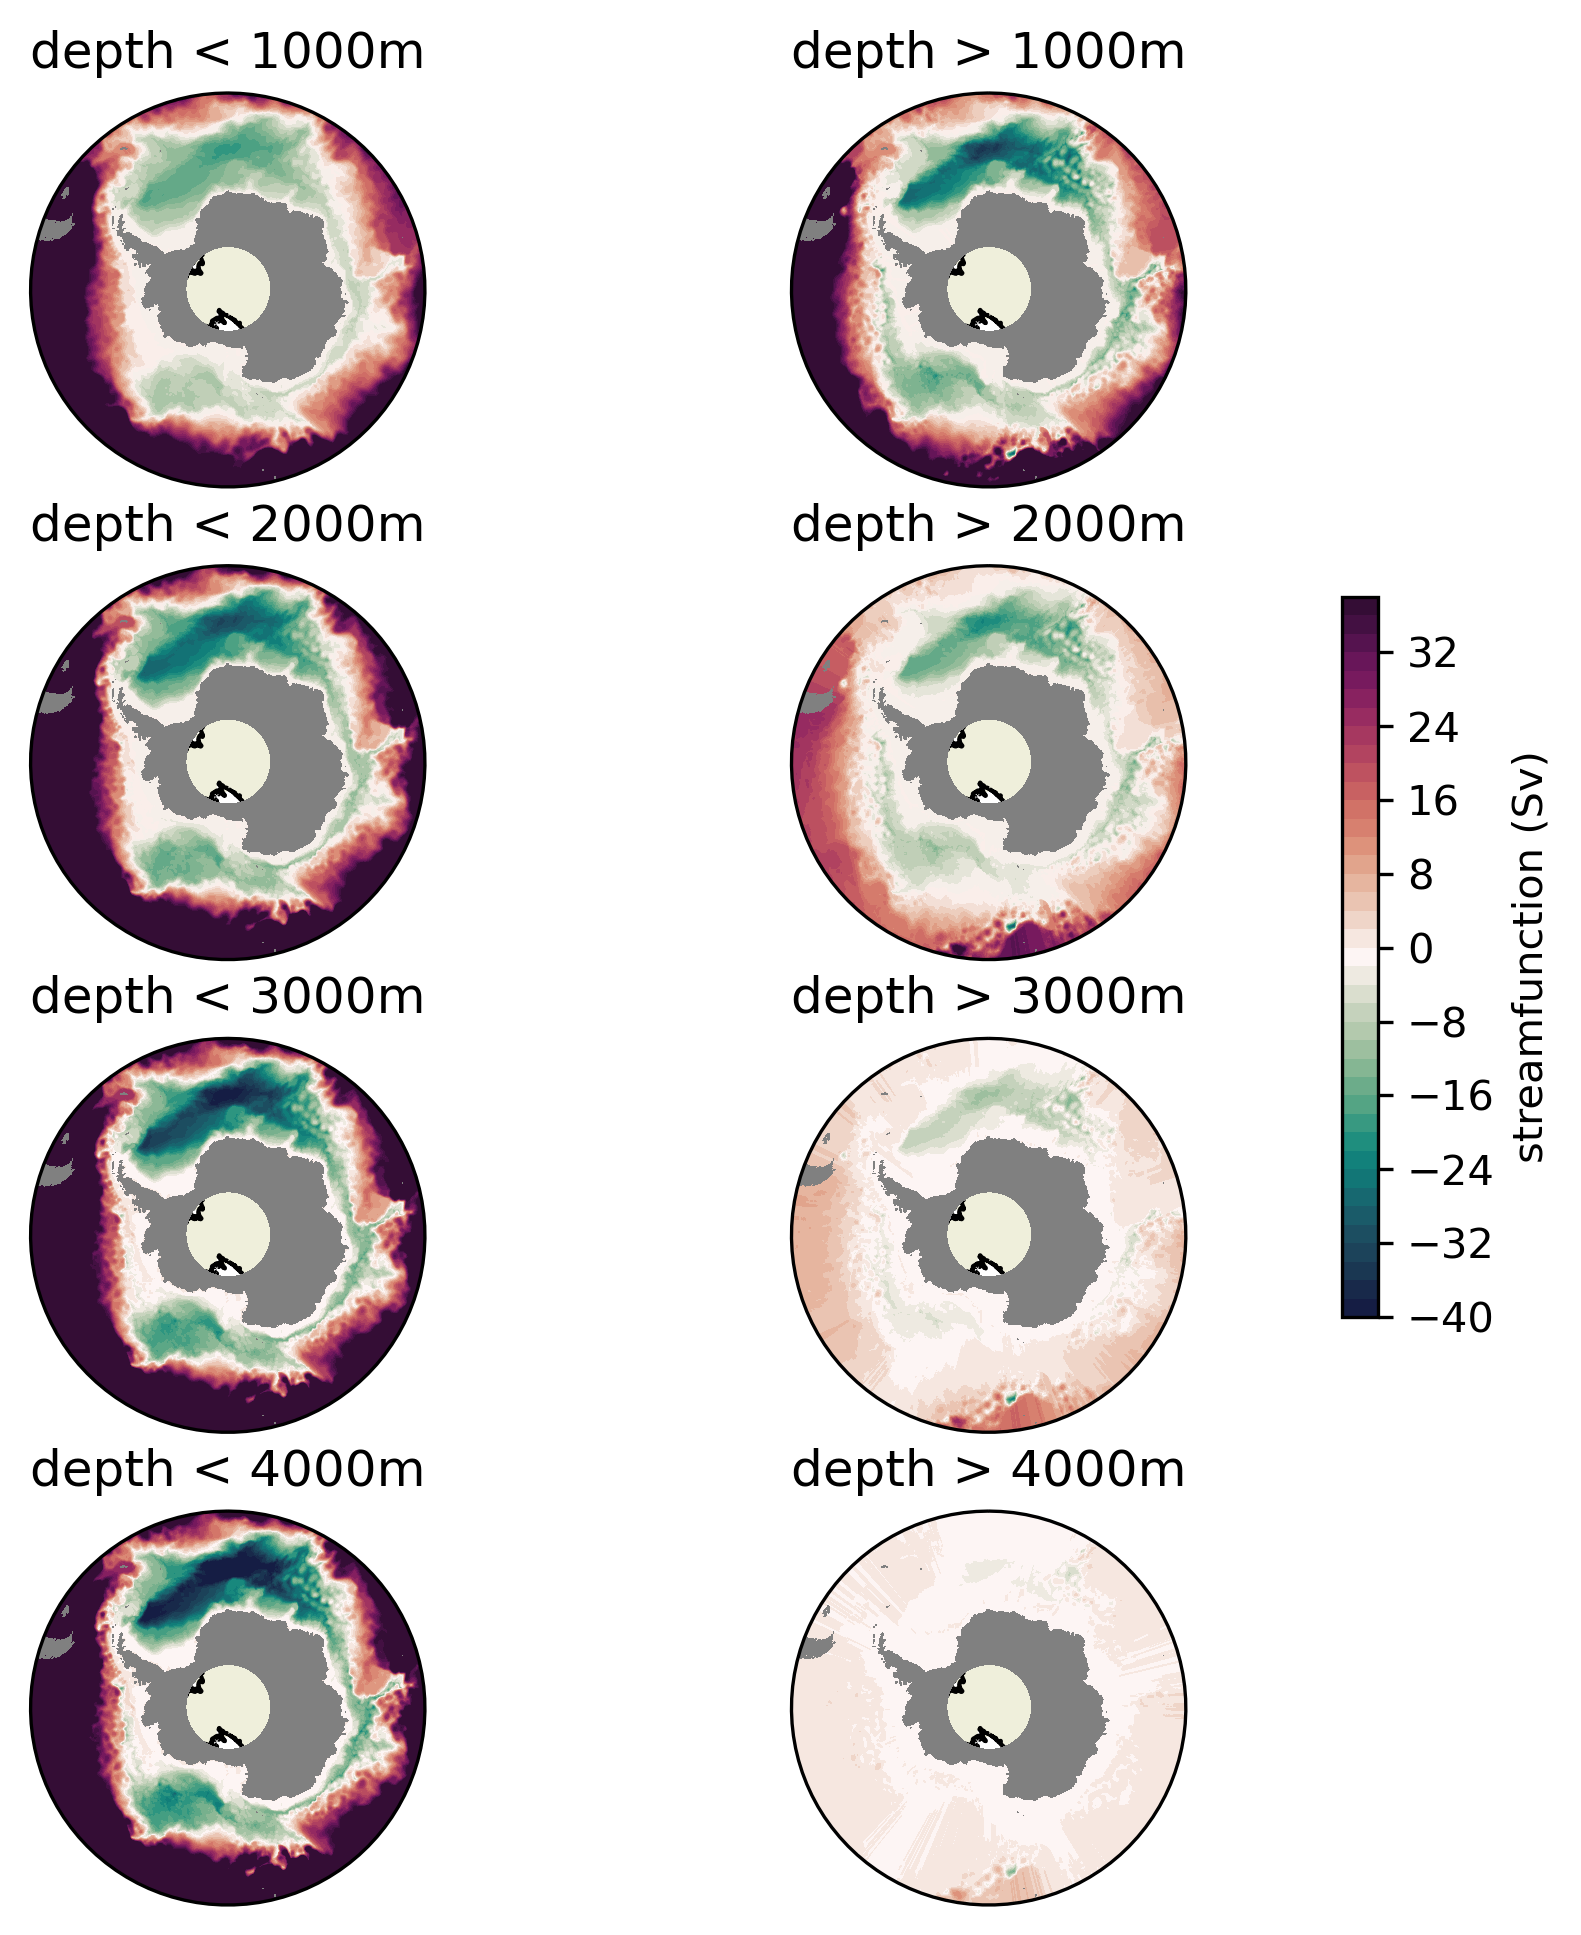

In [19]:
## plot umo and hmo
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(6, 8), dpi=300)
# flux1_upp
ax = plt.subplot(4,2,1,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp1.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 1000m')

# flux1_bot
ax = plt.subplot(4,2,2,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot1.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 1000m')

# flux2_upp
ax = plt.subplot(4,2,3,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp2.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 2000m')

# flux2_bot
ax = plt.subplot(4,2,4,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot2.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 2000m')

# flux3_upp
ax = plt.subplot(4,2,5,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp3.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 3000m')

# flux3_bot
ax = plt.subplot(4,2,6,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot3.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 3000m')

# flux4_upp
ax = plt.subplot(4,2,7,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp4.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 4000m')

# flux4_bot
ax = plt.subplot(4,2,8,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot4.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 4000m')

# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')

### different longitudes

In [24]:
# weddell
# xq = -30
flux11 = flux_upp1.sel(xu_ocean = -30,method = 'nearest')
flux21 = flux_upp2.sel(xu_ocean = -30,method = 'nearest')
flux31 = flux_upp3.sel(xu_ocean = -30,method = 'nearest')
flux41 = flux_upp4.sel(xu_ocean = -30,method = 'nearest')
# xq = 0
flux12 = flux_upp1.sel(xu_ocean = 0,method = 'nearest')
flux22 = flux_upp2.sel(xu_ocean = 0,method = 'nearest')
flux32 = flux_upp3.sel(xu_ocean = 0,method = 'nearest')
flux42 = flux_upp4.sel(xu_ocean = 0,method = 'nearest')
# xq = 30
flux13 = flux_upp1.sel(xu_ocean = 30,method = 'nearest')
flux23 = flux_upp2.sel(xu_ocean = 30,method = 'nearest')
flux33 = flux_upp3.sel(xu_ocean = 30,method = 'nearest')
flux43 = flux_upp4.sel(xu_ocean = 30,method = 'nearest')

# connection
# xq = 75
flux14 = flux_upp1.sel(xu_ocean = 50,method = 'nearest')
flux24 = flux_upp2.sel(xu_ocean = 50,method = 'nearest')
flux34 = flux_upp3.sel(xu_ocean = 50,method = 'nearest')
flux44 = flux_upp4.sel(xu_ocean = 50,method = 'nearest')
# xq = -270
flux15 = flux_upp1.sel(xu_ocean = -270,method = 'nearest')
flux25 = flux_upp2.sel(xu_ocean = -270,method = 'nearest')
flux35 = flux_upp3.sel(xu_ocean = -270,method = 'nearest')
flux45 = flux_upp4.sel(xu_ocean = -270,method = 'nearest')
# xq = -210
flux16 = flux_upp1.sel(xu_ocean = -210,method = 'nearest')
flux26 = flux_upp2.sel(xu_ocean = -210,method = 'nearest')
flux36 = flux_upp3.sel(xu_ocean = -210,method = 'nearest')
flux46 = flux_upp4.sel(xu_ocean = -210,method = 'nearest')

# Ross
# xq = -180
flux17 = flux_upp1.sel(xu_ocean = -180,method = 'nearest')
flux27 = flux_upp2.sel(xu_ocean = -180,method = 'nearest')
flux37 = flux_upp3.sel(xu_ocean = -180,method = 'nearest')
flux47 = flux_upp4.sel(xu_ocean = -180,method = 'nearest')
# xq = -150
flux18 = flux_upp1.sel(xu_ocean = -150,method = 'nearest')
flux28 = flux_upp2.sel(xu_ocean = -150,method = 'nearest')
flux38 = flux_upp3.sel(xu_ocean = -150,method = 'nearest')
flux48 = flux_upp4.sel(xu_ocean = -150,method = 'nearest')
# xq = -130
flux19 = flux_upp1.sel(xu_ocean = -130,method = 'nearest')
flux29 = flux_upp2.sel(xu_ocean = -130,method = 'nearest')
flux39 = flux_upp3.sel(xu_ocean = -130,method = 'nearest')
flux49 = flux_upp4.sel(xu_ocean = -130,method = 'nearest')

Text(0.5, 1.0, '130$^{\\circ}$ W')

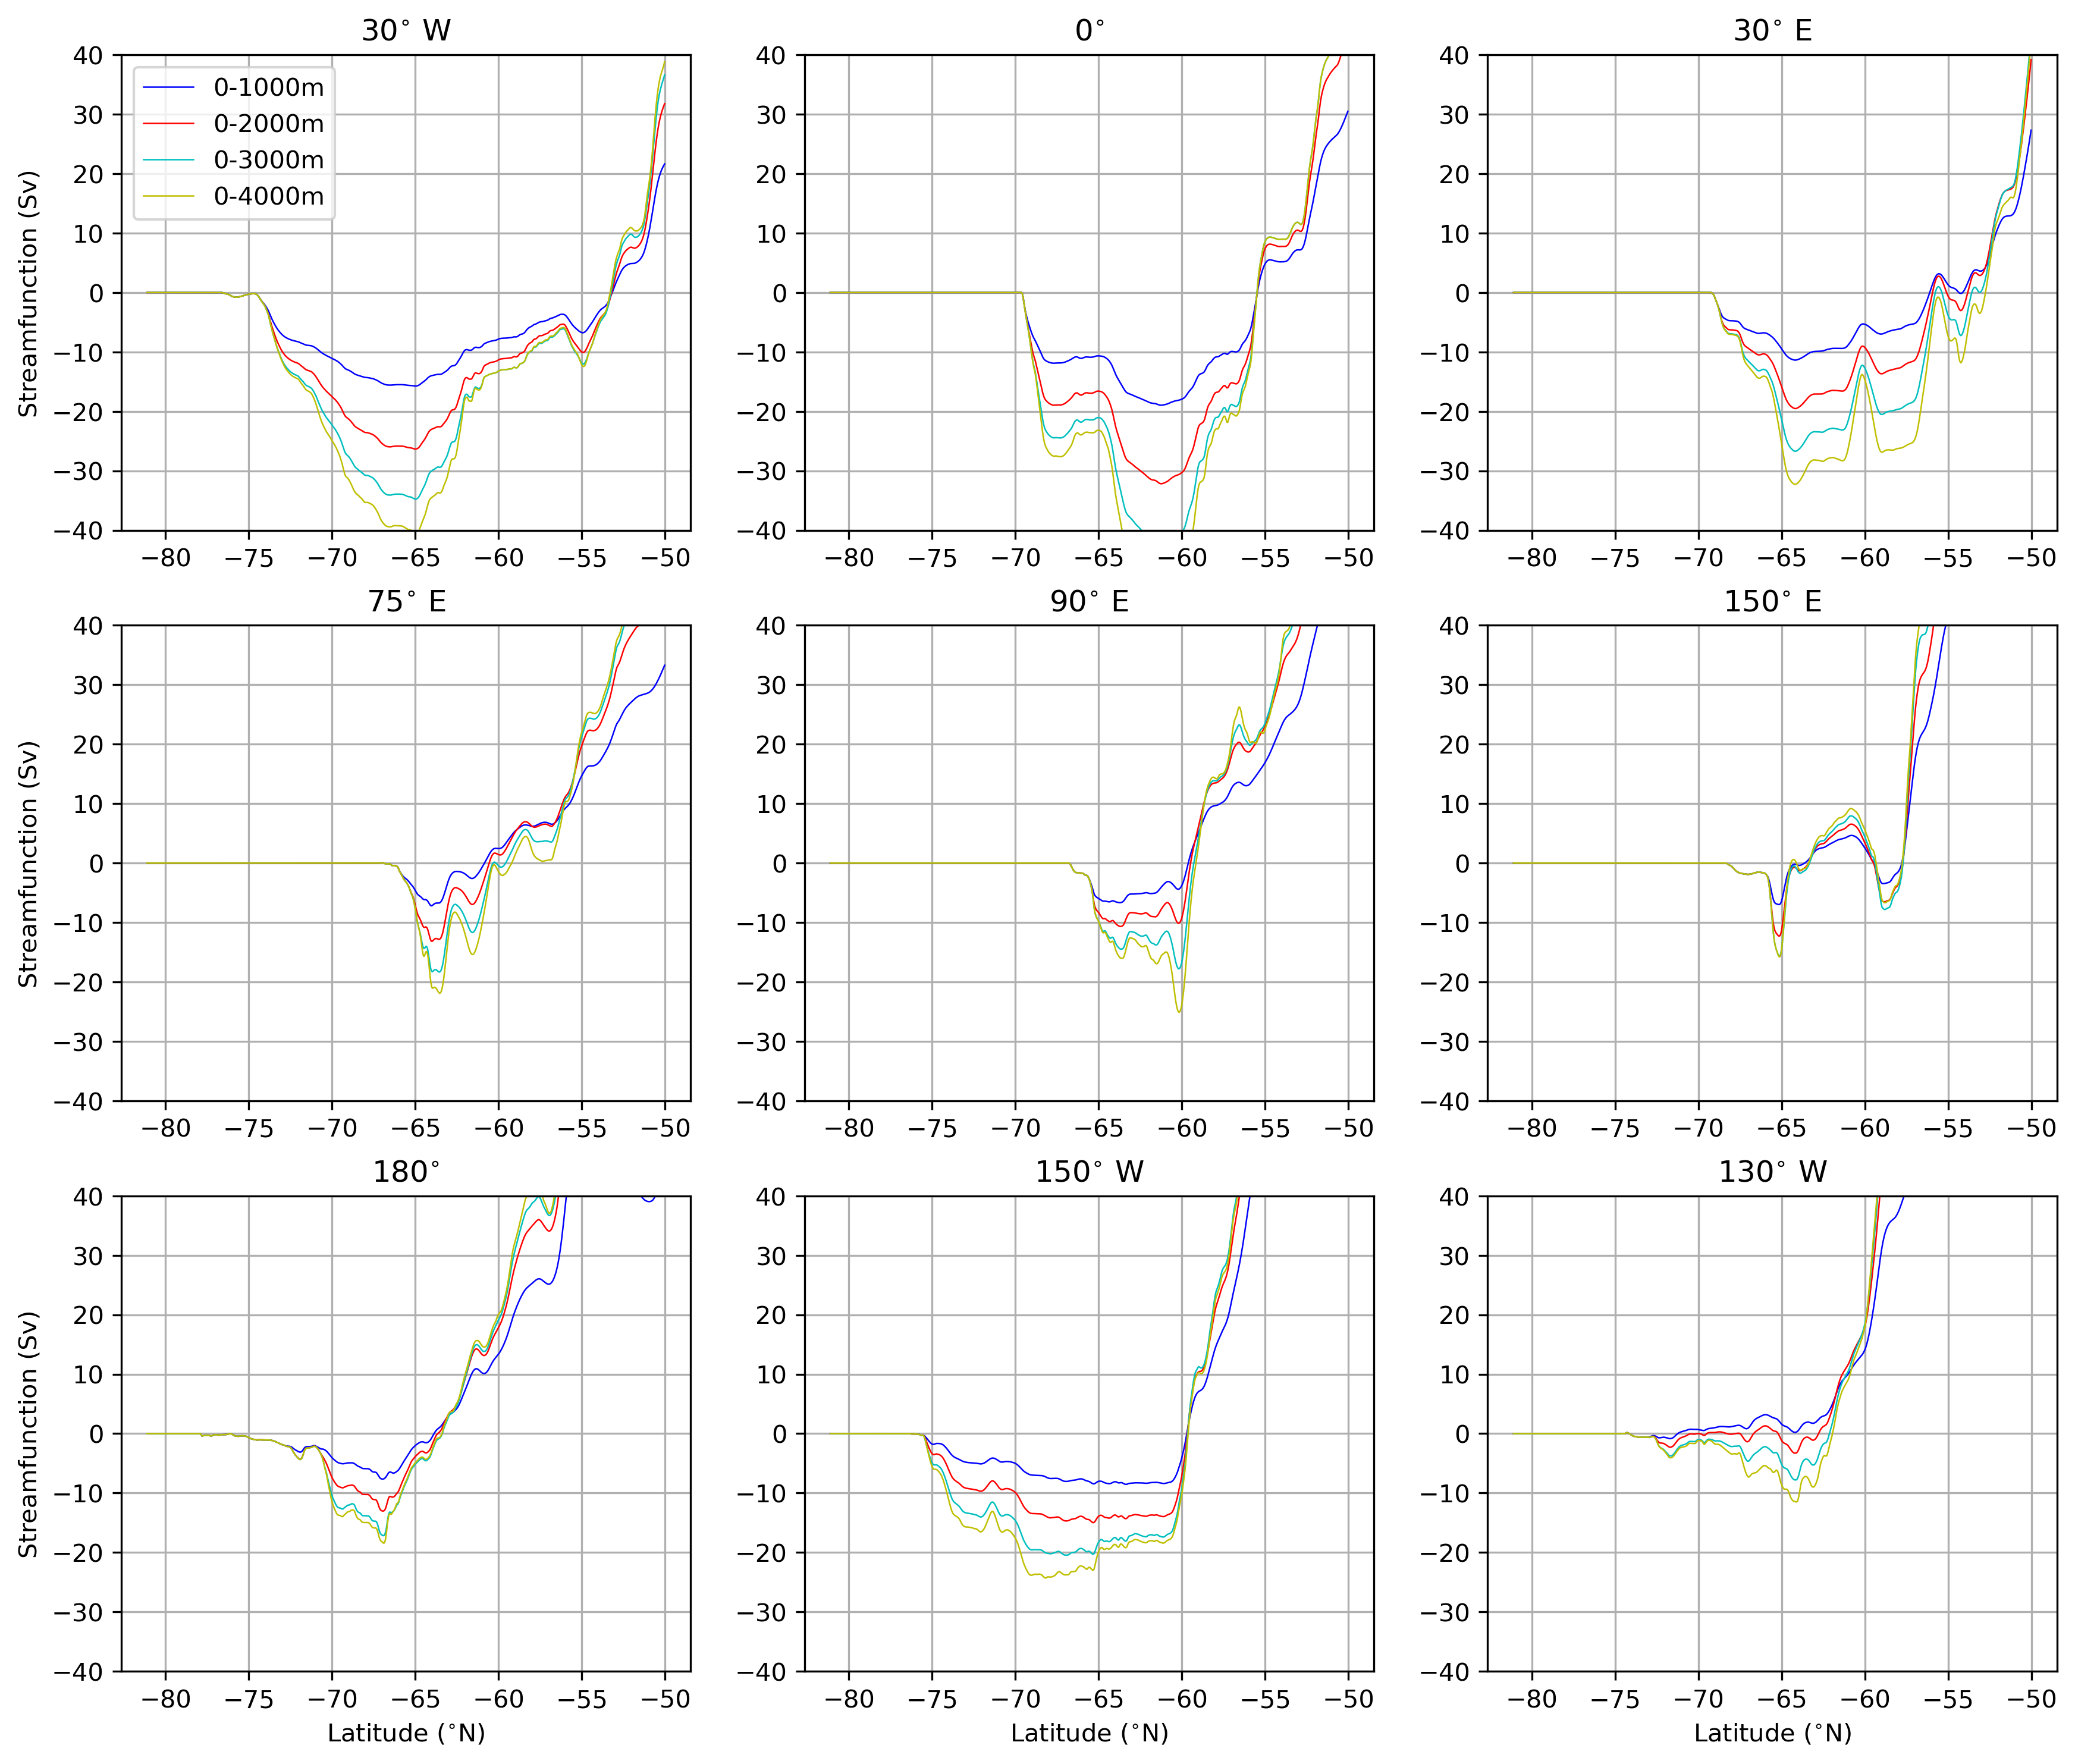

In [27]:
fig = plt.figure(figsize=(14, 12), dpi=300)
# 30W
plt.subplot(3,3,1)
plt.plot(flux11.yt_ocean.values,flux11.values,color = 'b',linewidth = 0.6)
plt.plot(flux21.yt_ocean.values,flux21.values,color = 'r',linewidth = 0.6)
plt.plot(flux31.yt_ocean.values,flux31.values,color = 'c',linewidth = 0.6)
plt.plot(flux41.yt_ocean.values,flux41.values,color = 'y',linewidth = 0.6)
plt.legend(['0-1000m','0-2000m','0-3000m','0-4000m'])
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-40,40)
plt.grid()
plt.title('30$^{\circ}$ W')
# 0
plt.subplot(3,3,2)
plt.plot(flux12.yt_ocean.values,flux12.values,color = 'b',linewidth = 0.6)
plt.plot(flux22.yt_ocean.values,flux22.values,color = 'r',linewidth = 0.6)
plt.plot(flux32.yt_ocean.values,flux32.values,color = 'c',linewidth = 0.6)
plt.plot(flux42.yt_ocean.values,flux42.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('0$^{\circ}$')
# 30 E
plt.subplot(3,3,3)
plt.plot(flux13.yt_ocean.values,flux13.values,color = 'b',linewidth = 0.6)
plt.plot(flux23.yt_ocean.values,flux23.values,color = 'r',linewidth = 0.6)
plt.plot(flux33.yt_ocean.values,flux33.values,color = 'c',linewidth = 0.6)
plt.plot(flux43.yt_ocean.values,flux43.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('30$^{\circ}$ E')
# 75 E
plt.subplot(3,3,4)
plt.plot(flux14.yt_ocean.values,flux14.values,color = 'b',linewidth = 0.6)
plt.plot(flux24.yt_ocean.values,flux24.values,color = 'r',linewidth = 0.6)
plt.plot(flux34.yt_ocean.values,flux34.values,color = 'c',linewidth = 0.6)
plt.plot(flux44.yt_ocean.values,flux44.values,color = 'y',linewidth = 0.6)
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-40,40)
plt.grid()
plt.title('75$^{\circ}$ E')

# 90 E
plt.subplot(3,3,5)
plt.plot(flux15.yt_ocean.values,flux15.values,color = 'b',linewidth = 0.6)
plt.plot(flux25.yt_ocean.values,flux25.values,color = 'r',linewidth = 0.6)
plt.plot(flux35.yt_ocean.values,flux35.values,color = 'c',linewidth = 0.6)
plt.plot(flux45.yt_ocean.values,flux45.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('90$^{\circ}$ E')

# 150 E
plt.subplot(3,3,6)
plt.plot(flux16.yt_ocean.values,flux16.values,color = 'b',linewidth = 0.6)
plt.plot(flux26.yt_ocean.values,flux26.values,color = 'r',linewidth = 0.6)
plt.plot(flux36.yt_ocean.values,flux36.values,color = 'c',linewidth = 0.6)
plt.plot(flux46.yt_ocean.values,flux46.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('150$^{\circ}$ E')

# 180
plt.subplot(3,3,7)
plt.plot(flux17.yt_ocean.values,flux17.values,color = 'b',linewidth = 0.6)
plt.plot(flux27.yt_ocean.values,flux27.values,color = 'r',linewidth = 0.6)
plt.plot(flux37.yt_ocean.values,flux37.values,color = 'c',linewidth = 0.6)
plt.plot(flux47.yt_ocean.values,flux47.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-40,40)
plt.grid()
plt.title('180$^{\circ}$')

# 150 W
plt.subplot(3,3,8)
plt.plot(flux18.yt_ocean.values,flux18.values,color = 'b',linewidth = 0.6)
plt.plot(flux28.yt_ocean.values,flux28.values,color = 'r',linewidth = 0.6)
plt.plot(flux38.yt_ocean.values,flux38.values,color = 'c',linewidth = 0.6)
plt.plot(flux48.yt_ocean.values,flux48.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-40,40)
plt.grid()
plt.title('150$^{\circ}$ W')

# 130 W
plt.subplot(3,3,9)
plt.plot(flux19.yt_ocean.values,flux19.values,color = 'b',linewidth = 0.6)
plt.plot(flux29.yt_ocean.values,flux29.values,color = 'r',linewidth = 0.6)
plt.plot(flux39.yt_ocean.values,flux39.values,color = 'c',linewidth = 0.6)
plt.plot(flux49.yt_ocean.values,flux49.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-40,40)
plt.grid()
plt.title('130$^{\circ}$ W')

### different 1000m-layers

In [28]:
flux1 = flux.sel(st_ocean = slice(0,1000)).sum('st_ocean').load()
flux2 = flux.sel(st_ocean = slice(1000,2000)).sum('st_ocean').load()
flux3 = flux.sel(st_ocean = slice(2000,3000)).sum('st_ocean').load()
flux4 = flux.sel(st_ocean = slice(3000,4000)).sum('st_ocean').load()

Text(0, 0.5, 'streamfunction (Sv)')

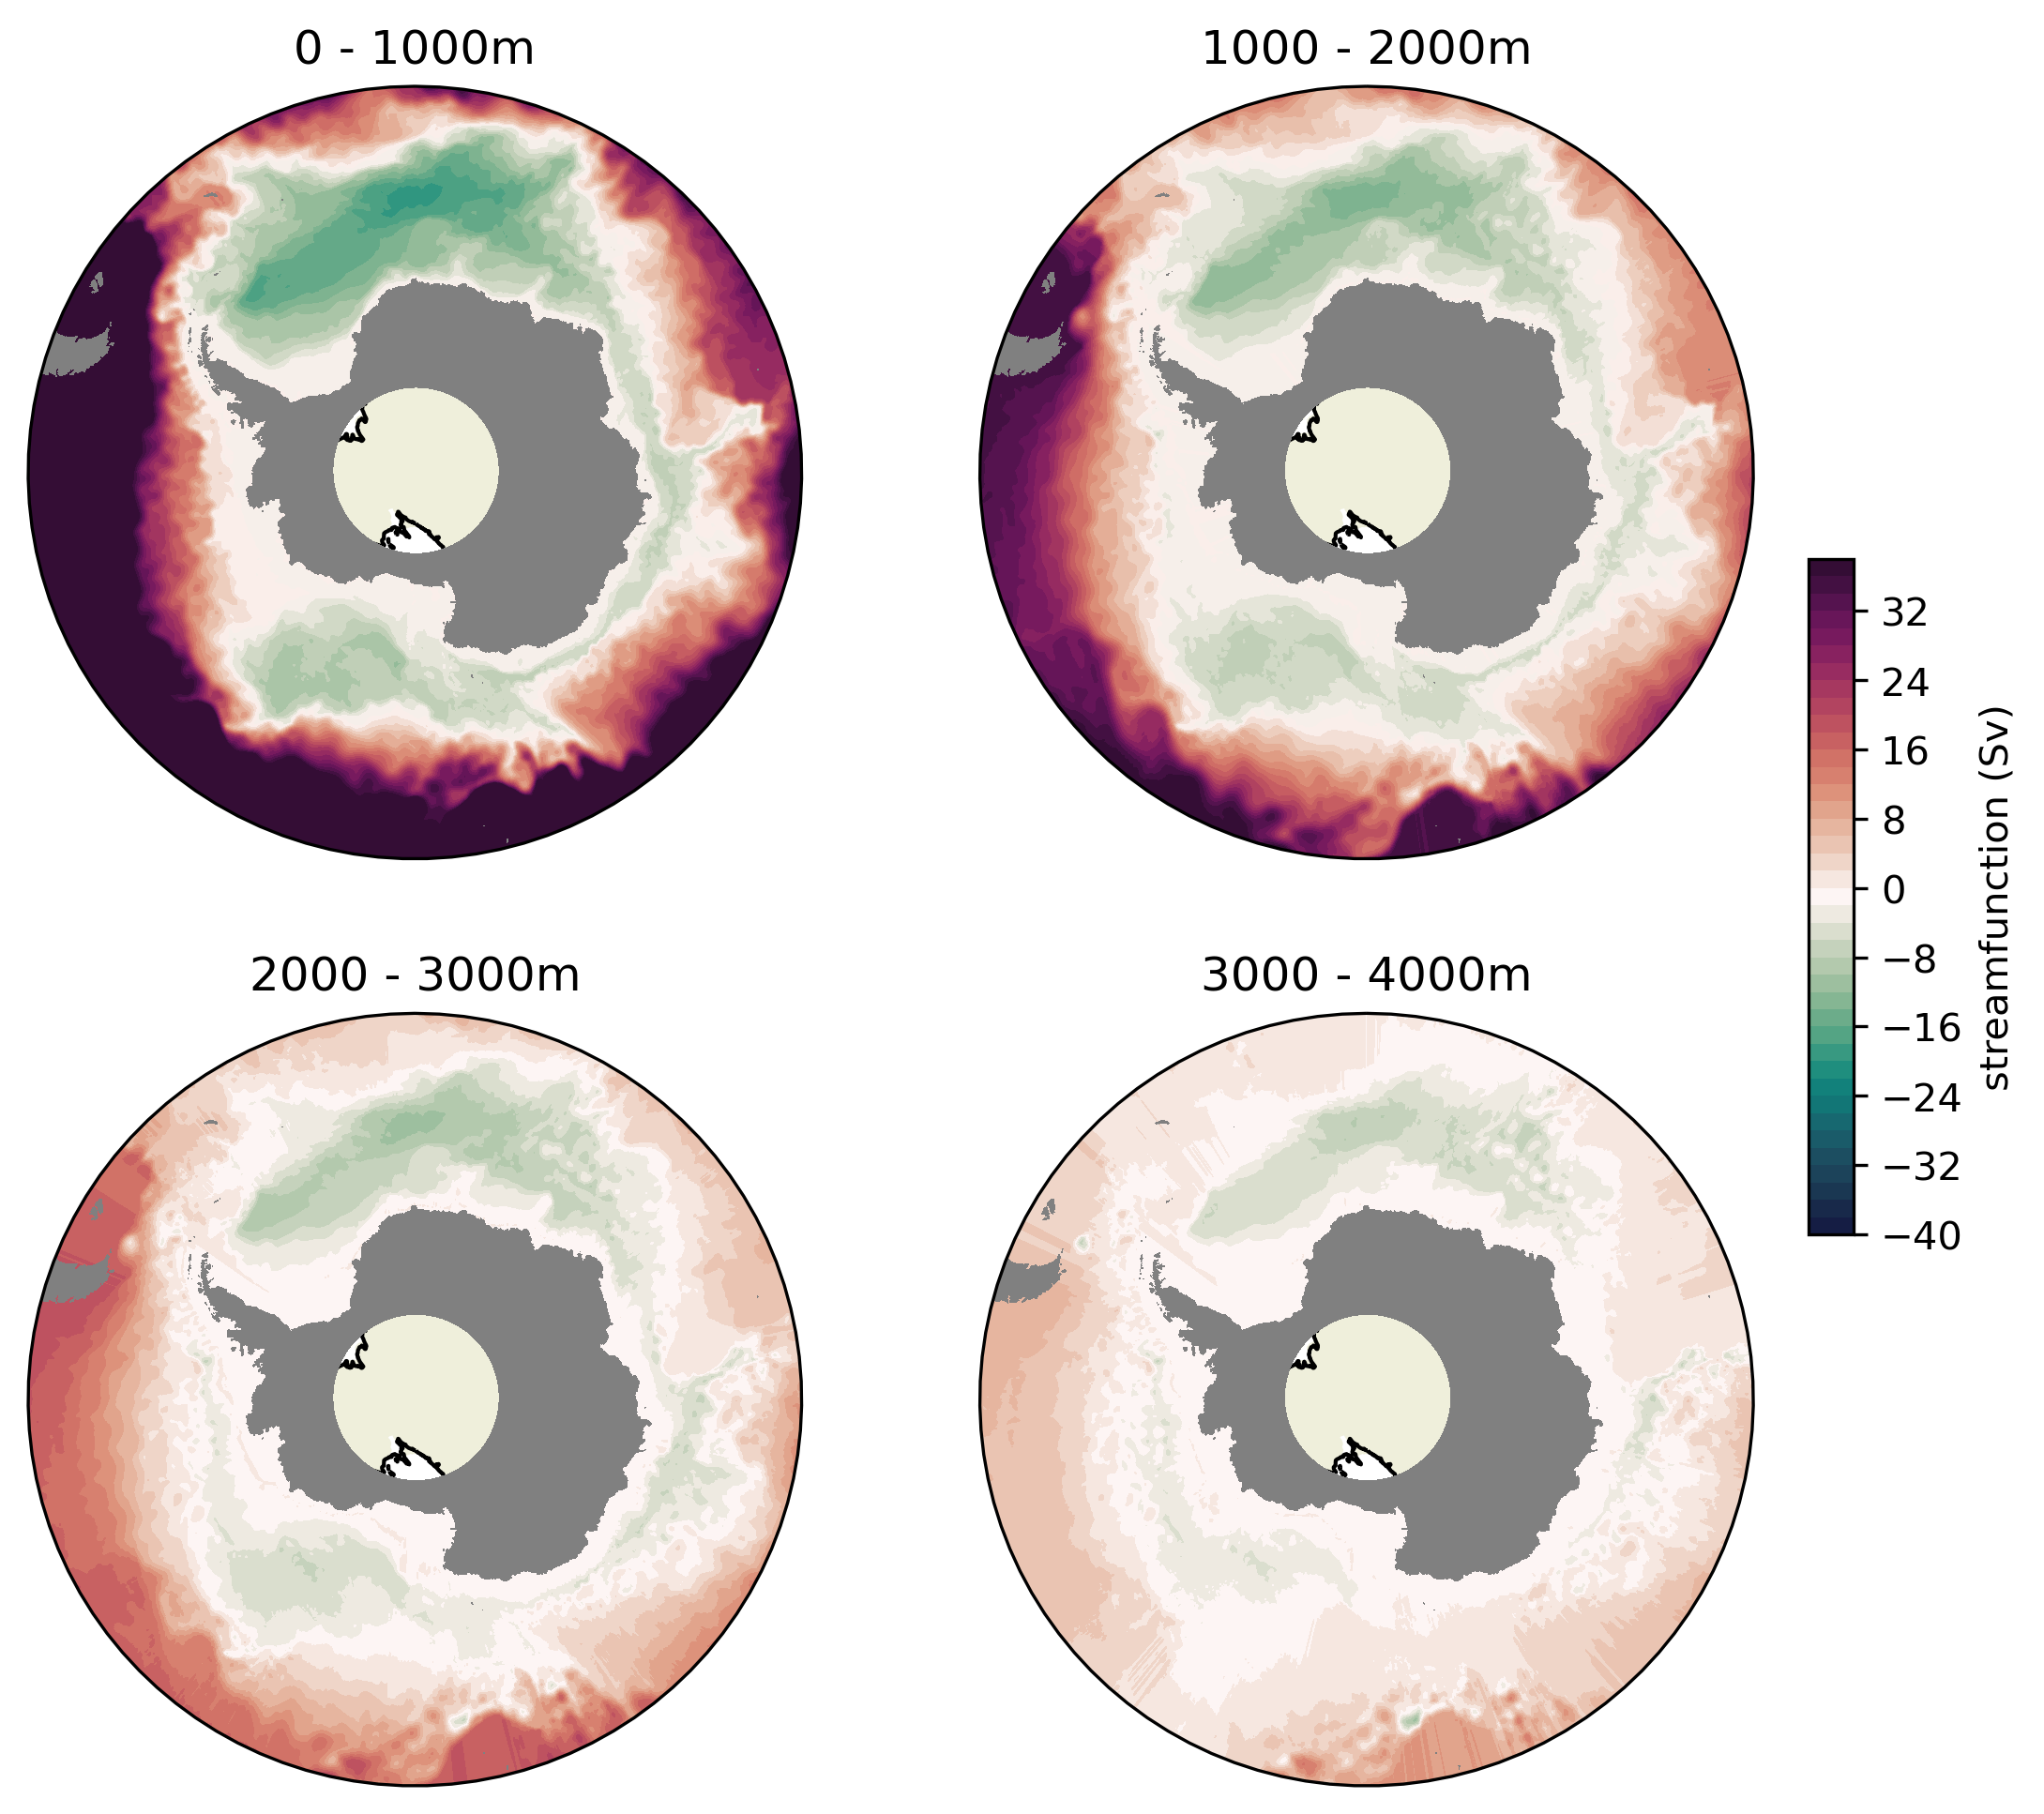

In [29]:
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=300)
# flux1
ax = plt.subplot(2,2,1,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux1.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('0 - 1000m')

# flux2
ax = plt.subplot(2,2,2,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux2.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('1000 - 2000m')

# flux3
ax = plt.subplot(2,2,3,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux3.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('2000 - 3000m')

# flux4
ax = plt.subplot(2,2,4,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux4.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('3000 - 4000m')

# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')

### Now test flux of 4 layers at different longitude

In [31]:
# weddell
# xq = -30
flux11 = flux1.sel(xu_ocean = -30,method = 'nearest')
flux21 = flux2.sel(xu_ocean = -30,method = 'nearest')
flux31 = flux3.sel(xu_ocean = -30,method = 'nearest')
flux41 = flux4.sel(xu_ocean = -30,method = 'nearest')
# xq = 0
flux12 = flux1.sel(xu_ocean = 0,method = 'nearest')
flux22 = flux2.sel(xu_ocean = 0,method = 'nearest')
flux32 = flux3.sel(xu_ocean = 0,method = 'nearest')
flux42 = flux4.sel(xu_ocean = 0,method = 'nearest')
# xq = 30
flux13 = flux1.sel(xu_ocean = 30,method = 'nearest')
flux23 = flux2.sel(xu_ocean = 30,method = 'nearest')
flux33 = flux3.sel(xu_ocean = 30,method = 'nearest')
flux43 = flux4.sel(xu_ocean = 30,method = 'nearest')

# connection
# xq = 75
flux14 = flux1.sel(xu_ocean = 50,method = 'nearest')
flux24 = flux2.sel(xu_ocean = 50,method = 'nearest')
flux34 = flux3.sel(xu_ocean = 50,method = 'nearest')
flux44 = flux4.sel(xu_ocean = 50,method = 'nearest')
# xq = -270
flux15 = flux1.sel(xu_ocean = -270,method = 'nearest')
flux25 = flux2.sel(xu_ocean = -270,method = 'nearest')
flux35 = flux3.sel(xu_ocean = -270,method = 'nearest')
flux45 = flux4.sel(xu_ocean = -270,method = 'nearest')
# xq = -210
flux16 = flux1.sel(xu_ocean = -210,method = 'nearest')
flux26 = flux2.sel(xu_ocean = -210,method = 'nearest')
flux36 = flux3.sel(xu_ocean = -210,method = 'nearest')
flux46 = flux4.sel(xu_ocean = -210,method = 'nearest')

# Ross
# xq = -180
flux17 = flux1.sel(xu_ocean = -180,method = 'nearest')
flux27 = flux2.sel(xu_ocean = -180,method = 'nearest')
flux37 = flux3.sel(xu_ocean = -180,method = 'nearest')
flux47 = flux4.sel(xu_ocean = -180,method = 'nearest')
# xq = -150
flux18 = flux1.sel(xu_ocean = -150,method = 'nearest')
flux28 = flux2.sel(xu_ocean = -150,method = 'nearest')
flux38 = flux3.sel(xu_ocean = -150,method = 'nearest')
flux48 = flux4.sel(xu_ocean = -150,method = 'nearest')
# xq = -130
flux19 = flux1.sel(xu_ocean = -130,method = 'nearest')
flux29 = flux2.sel(xu_ocean = -130,method = 'nearest')
flux39 = flux3.sel(xu_ocean = -130,method = 'nearest')
flux49 = flux4.sel(xu_ocean = -130,method = 'nearest')

Text(0.5, 1.0, '130$^{\\circ}$ W')

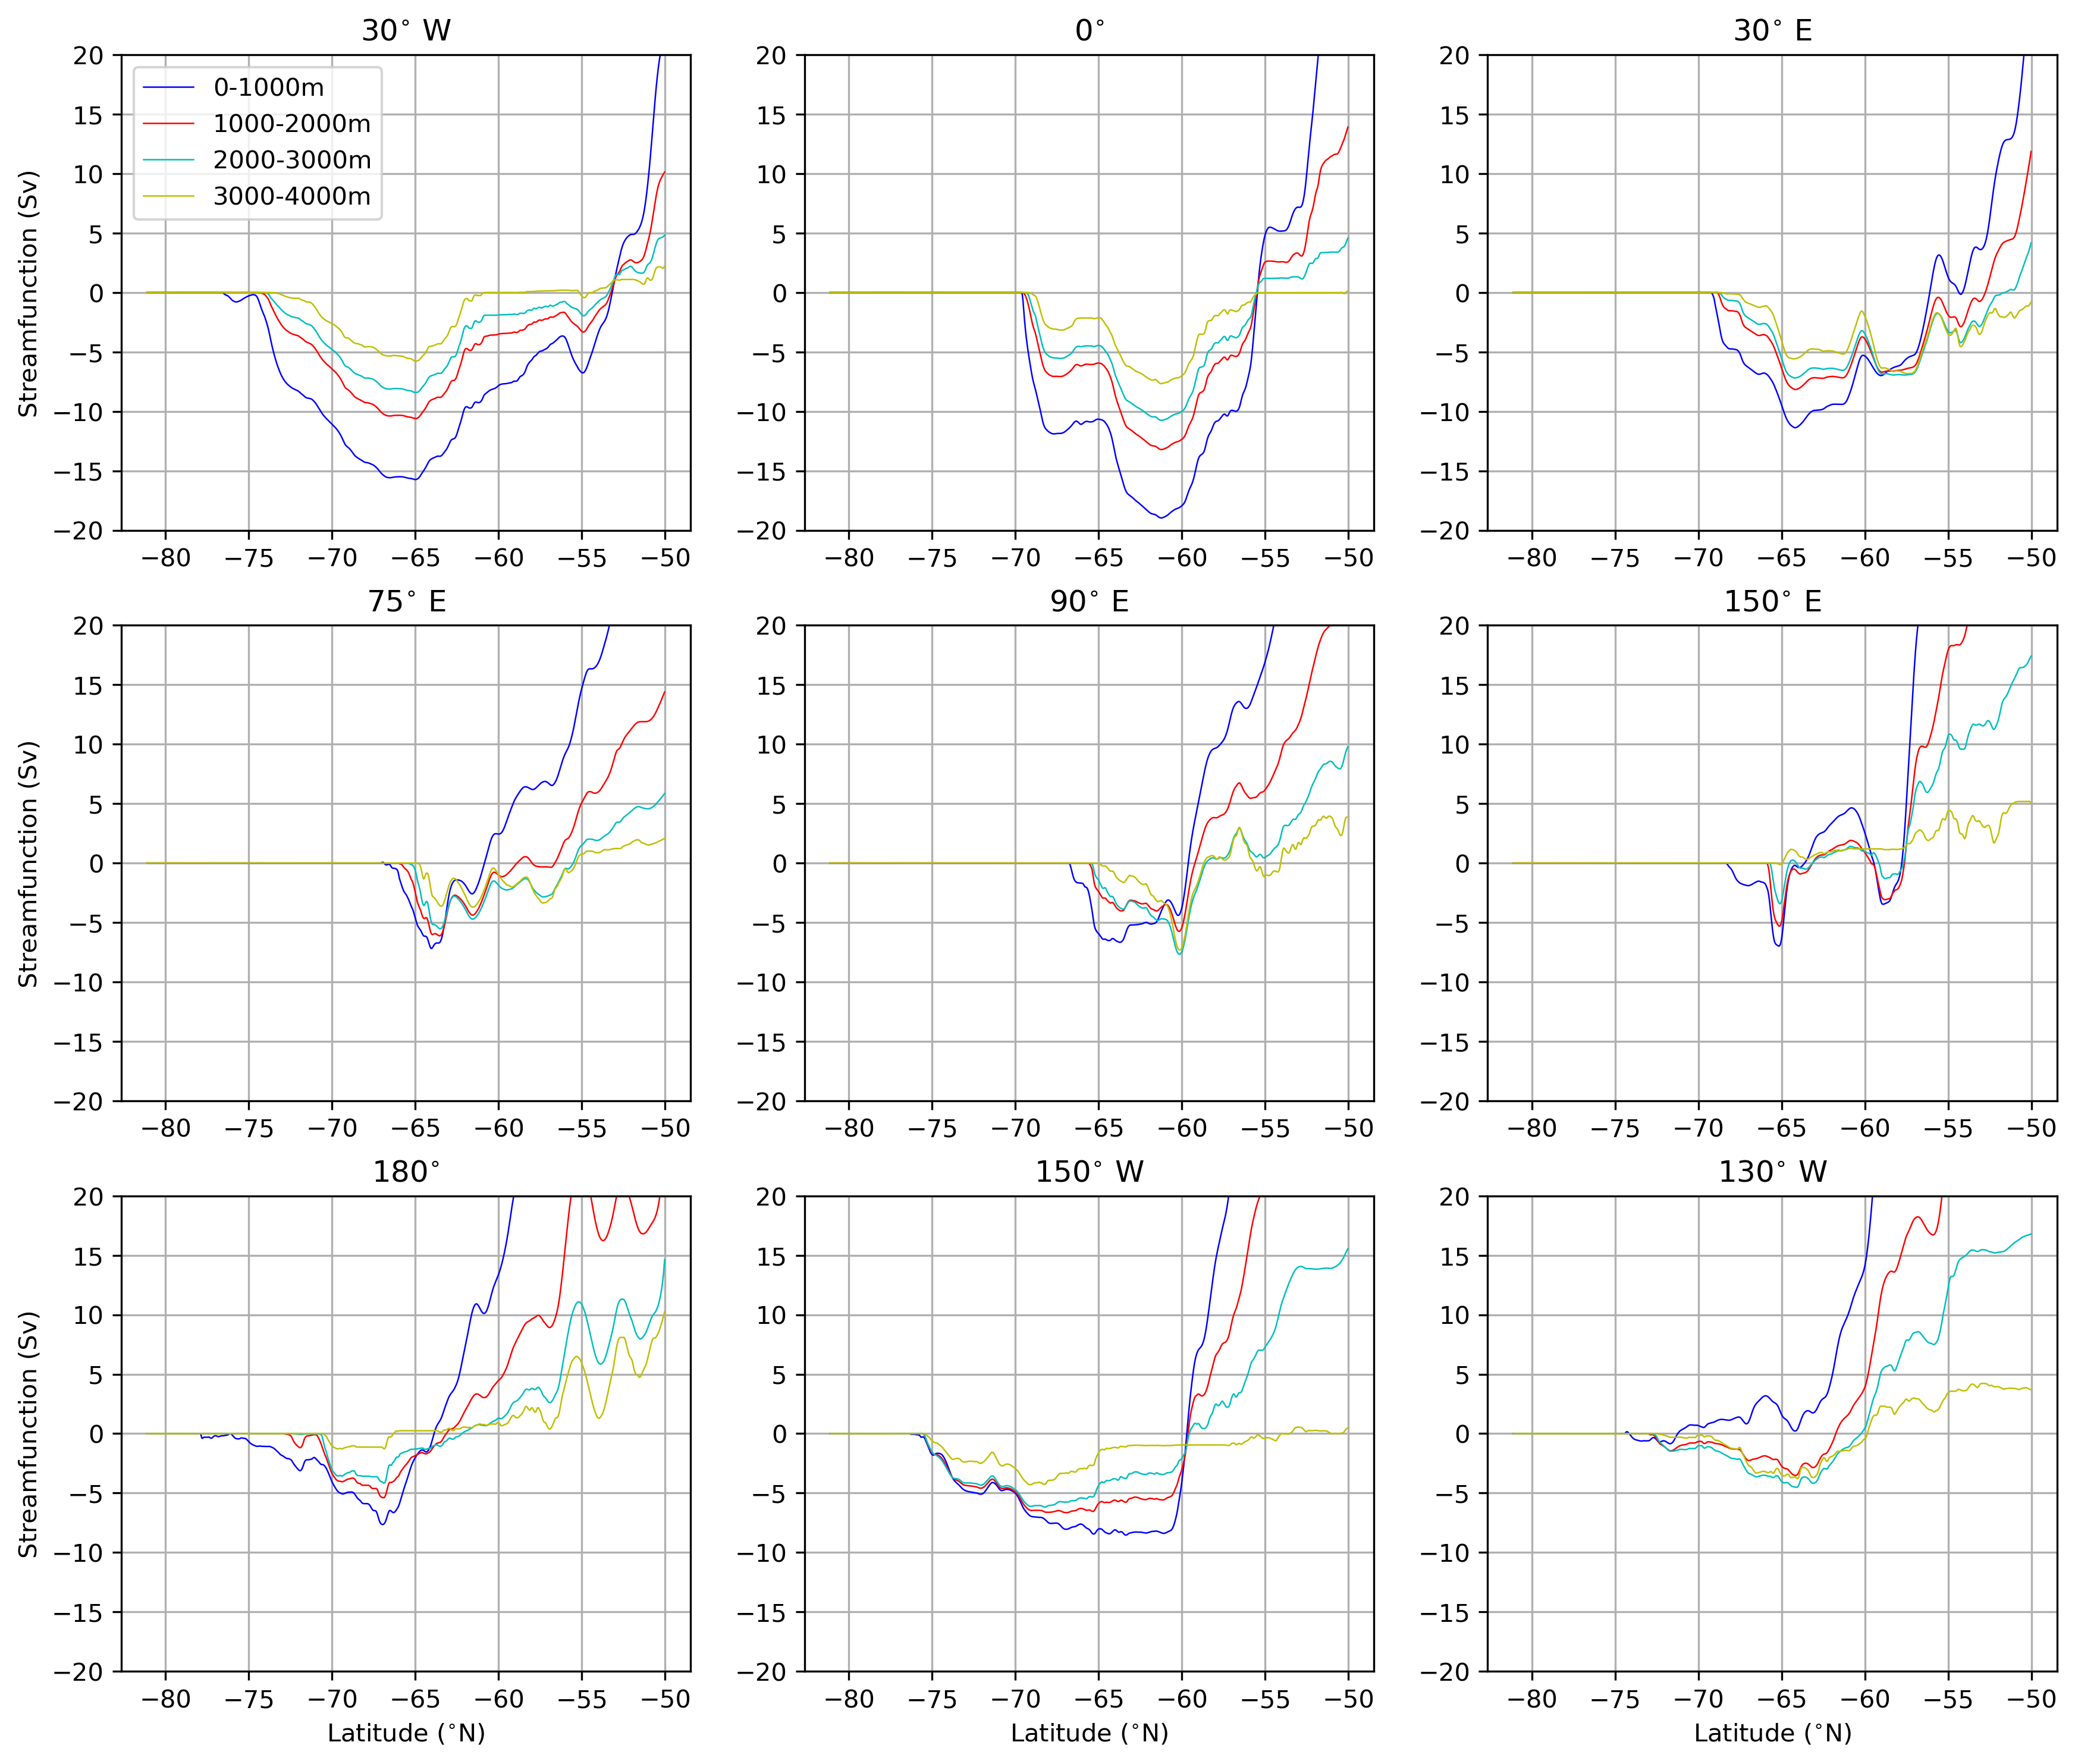

In [32]:
fig = plt.figure(figsize=(14, 12), dpi=300)
# 30W
plt.subplot(3,3,1)
plt.plot(flux11.yt_ocean.values,flux11.values,color = 'b',linewidth = 0.6)
plt.plot(flux21.yt_ocean.values,flux21.values,color = 'r',linewidth = 0.6)
plt.plot(flux31.yt_ocean.values,flux31.values,color = 'c',linewidth = 0.6)
plt.plot(flux41.yt_ocean.values,flux41.values,color = 'y',linewidth = 0.6)
plt.legend(['0-1000m','1000-2000m','2000-3000m','3000-4000m'])
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-20,20)
plt.grid()
plt.title('30$^{\circ}$ W')
# 0
plt.subplot(3,3,2)
plt.plot(flux12.yt_ocean.values,flux12.values,color = 'b',linewidth = 0.6)
plt.plot(flux22.yt_ocean.values,flux22.values,color = 'r',linewidth = 0.6)
plt.plot(flux32.yt_ocean.values,flux32.values,color = 'c',linewidth = 0.6)
plt.plot(flux42.yt_ocean.values,flux42.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('0$^{\circ}$')
# 30 E
plt.subplot(3,3,3)
plt.plot(flux13.yt_ocean.values,flux13.values,color = 'b',linewidth = 0.6)
plt.plot(flux23.yt_ocean.values,flux23.values,color = 'r',linewidth = 0.6)
plt.plot(flux33.yt_ocean.values,flux33.values,color = 'c',linewidth = 0.6)
plt.plot(flux43.yt_ocean.values,flux43.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('30$^{\circ}$ E')
# 75 E
plt.subplot(3,3,4)
plt.plot(flux14.yt_ocean.values,flux14.values,color = 'b',linewidth = 0.6)
plt.plot(flux24.yt_ocean.values,flux24.values,color = 'r',linewidth = 0.6)
plt.plot(flux34.yt_ocean.values,flux34.values,color = 'c',linewidth = 0.6)
plt.plot(flux44.yt_ocean.values,flux44.values,color = 'y',linewidth = 0.6)
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-20,20)
plt.grid()
plt.title('75$^{\circ}$ E')

# 90 E
plt.subplot(3,3,5)
plt.plot(flux15.yt_ocean.values,flux15.values,color = 'b',linewidth = 0.6)
plt.plot(flux25.yt_ocean.values,flux25.values,color = 'r',linewidth = 0.6)
plt.plot(flux35.yt_ocean.values,flux35.values,color = 'c',linewidth = 0.6)
plt.plot(flux45.yt_ocean.values,flux45.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('90$^{\circ}$ E')

# 150 E
plt.subplot(3,3,6)
plt.plot(flux16.yt_ocean.values,flux16.values,color = 'b',linewidth = 0.6)
plt.plot(flux26.yt_ocean.values,flux26.values,color = 'r',linewidth = 0.6)
plt.plot(flux36.yt_ocean.values,flux36.values,color = 'c',linewidth = 0.6)
plt.plot(flux46.yt_ocean.values,flux46.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('150$^{\circ}$ E')

# 180
plt.subplot(3,3,7)
plt.plot(flux17.yt_ocean.values,flux17.values,color = 'b',linewidth = 0.6)
plt.plot(flux27.yt_ocean.values,flux27.values,color = 'r',linewidth = 0.6)
plt.plot(flux37.yt_ocean.values,flux37.values,color = 'c',linewidth = 0.6)
plt.plot(flux47.yt_ocean.values,flux47.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-20,20)
plt.grid()
plt.title('180$^{\circ}$')

# 150 W
plt.subplot(3,3,8)
plt.plot(flux18.yt_ocean.values,flux18.values,color = 'b',linewidth = 0.6)
plt.plot(flux28.yt_ocean.values,flux28.values,color = 'r',linewidth = 0.6)
plt.plot(flux38.yt_ocean.values,flux38.values,color = 'c',linewidth = 0.6)
plt.plot(flux48.yt_ocean.values,flux48.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-20,20)
plt.grid()
plt.title('150$^{\circ}$ W')

# 130 W
plt.subplot(3,3,9)
plt.plot(flux19.yt_ocean.values,flux19.values,color = 'b',linewidth = 0.6)
plt.plot(flux29.yt_ocean.values,flux29.values,color = 'r',linewidth = 0.6)
plt.plot(flux39.yt_ocean.values,flux39.values,color = 'c',linewidth = 0.6)
plt.plot(flux49.yt_ocean.values,flux49.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-20,20)
plt.grid()
plt.title('130$^{\circ}$ W')

# 0.25 deg resolution

In [34]:
umo = cc.querying.getvar(expt='025deg_jra55_iaf_omip2_cycle1', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time=start_time, 
                          end_time=end_time)


In [35]:
umo = umo.sel(time = slice(start_time,end_time)).sel(yt_ocean = slice(-90,-50))

In [36]:
flux = umo.mean('time').cumsum('yt_ocean')/1e9

### Now we test streamfunction at (x,y) in different depth layer

In [37]:
# layers at 1000m
flux_upp1 = flux.sel(st_ocean = slice(0,1000)).sum('st_ocean').load()
flux_bot1 = flux.sel(st_ocean = slice(1000,10000.)).sum('st_ocean').load()
# layers at 2000m
flux_upp2 = flux.sel(st_ocean = slice(0,2000)).sum('st_ocean').load()
flux_bot2 = flux.sel(st_ocean = slice(2000,10000.)).sum('st_ocean').load()
# layers at 3000m
flux_upp3 = flux.sel(st_ocean = slice(0,3000)).sum('st_ocean').load()
flux_bot3 = flux.sel(st_ocean = slice(3000,10000.)).sum('st_ocean').load()
# layers at 4000m
flux_upp4 = flux.sel(st_ocean = slice(0,4000)).sum('st_ocean').load()
flux_bot4 = flux.sel(st_ocean = slice(4000,10000.)).sum('st_ocean').load()

Text(0, 0.5, 'streamfunction (Sv)')

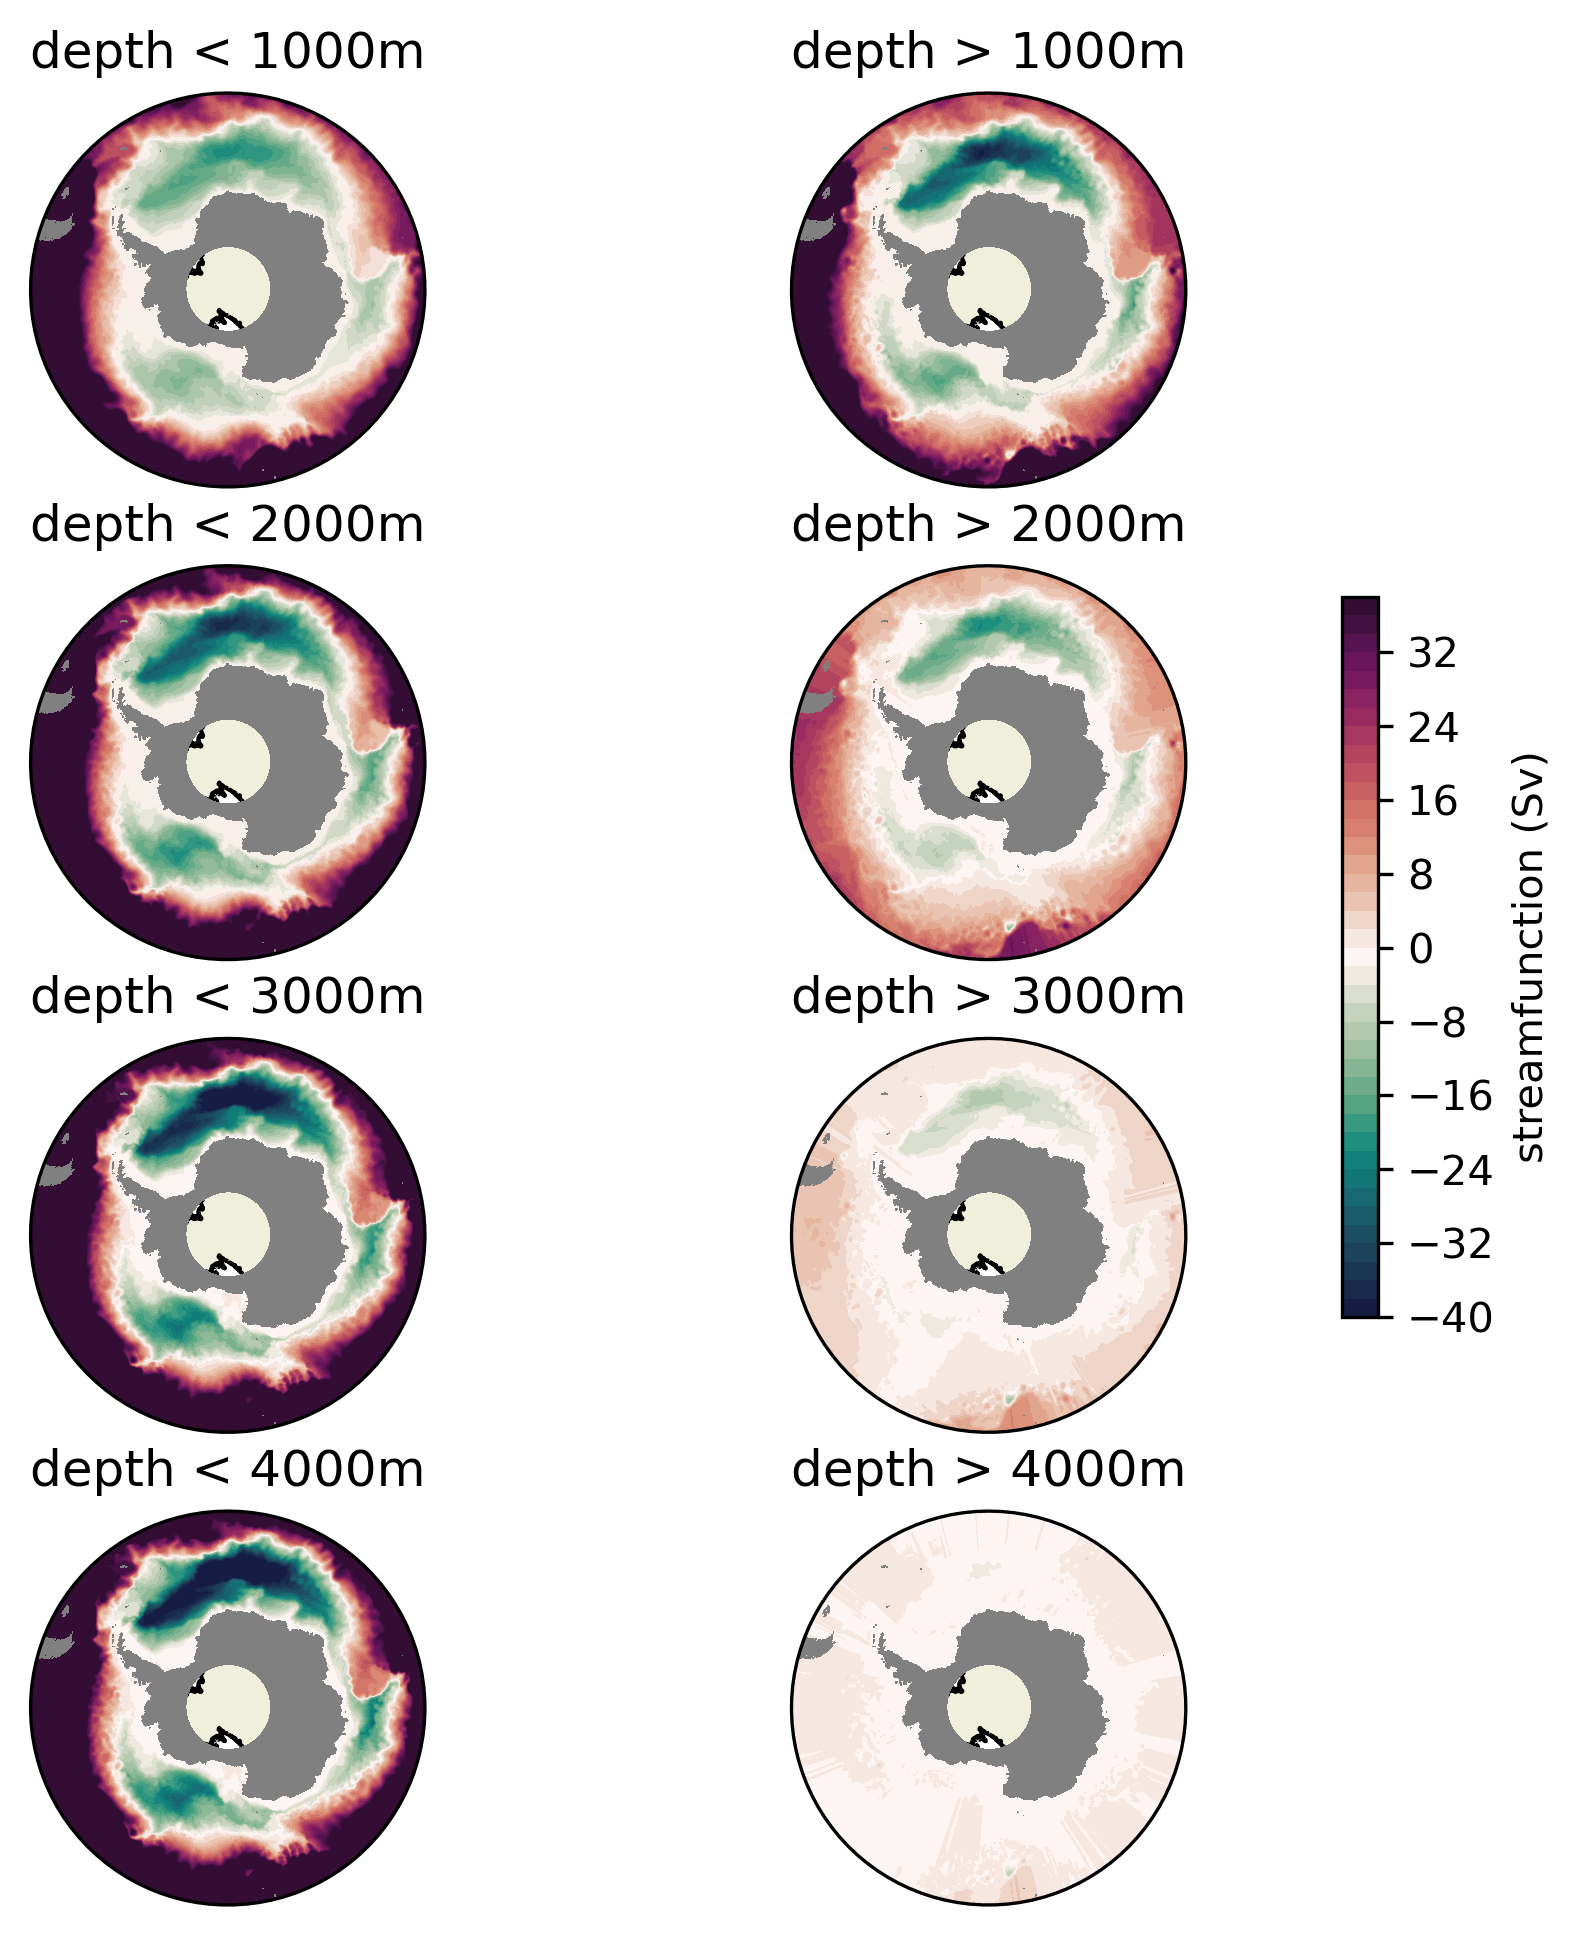

In [38]:
## plot umo and hmo
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(6, 8), dpi=300)
# flux1_upp
ax = plt.subplot(4,2,1,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp1.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 1000m')

# flux1_bot
ax = plt.subplot(4,2,2,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot1.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 1000m')

# flux2_upp
ax = plt.subplot(4,2,3,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp2.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 2000m')

# flux2_bot
ax = plt.subplot(4,2,4,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot2.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 2000m')

# flux3_upp
ax = plt.subplot(4,2,5,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp3.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 3000m')

# flux3_bot
ax = plt.subplot(4,2,6,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot3.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 3000m')

# flux4_upp
ax = plt.subplot(4,2,7,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp4.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 4000m')

# flux4_bot
ax = plt.subplot(4,2,8,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot4.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 4000m')

# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')

### different longitudes

In [39]:
# weddell
# xq = -30
flux11 = flux_upp1.sel(xu_ocean = -30,method = 'nearest')
flux21 = flux_upp2.sel(xu_ocean = -30,method = 'nearest')
flux31 = flux_upp3.sel(xu_ocean = -30,method = 'nearest')
flux41 = flux_upp4.sel(xu_ocean = -30,method = 'nearest')
# xq = 0
flux12 = flux_upp1.sel(xu_ocean = 0,method = 'nearest')
flux22 = flux_upp2.sel(xu_ocean = 0,method = 'nearest')
flux32 = flux_upp3.sel(xu_ocean = 0,method = 'nearest')
flux42 = flux_upp4.sel(xu_ocean = 0,method = 'nearest')
# xq = 30
flux13 = flux_upp1.sel(xu_ocean = 30,method = 'nearest')
flux23 = flux_upp2.sel(xu_ocean = 30,method = 'nearest')
flux33 = flux_upp3.sel(xu_ocean = 30,method = 'nearest')
flux43 = flux_upp4.sel(xu_ocean = 30,method = 'nearest')

# connection
# xq = 75
flux14 = flux_upp1.sel(xu_ocean = 50,method = 'nearest')
flux24 = flux_upp2.sel(xu_ocean = 50,method = 'nearest')
flux34 = flux_upp3.sel(xu_ocean = 50,method = 'nearest')
flux44 = flux_upp4.sel(xu_ocean = 50,method = 'nearest')
# xq = -270
flux15 = flux_upp1.sel(xu_ocean = -270,method = 'nearest')
flux25 = flux_upp2.sel(xu_ocean = -270,method = 'nearest')
flux35 = flux_upp3.sel(xu_ocean = -270,method = 'nearest')
flux45 = flux_upp4.sel(xu_ocean = -270,method = 'nearest')
# xq = -210
flux16 = flux_upp1.sel(xu_ocean = -210,method = 'nearest')
flux26 = flux_upp2.sel(xu_ocean = -210,method = 'nearest')
flux36 = flux_upp3.sel(xu_ocean = -210,method = 'nearest')
flux46 = flux_upp4.sel(xu_ocean = -210,method = 'nearest')

# Ross
# xq = -180
flux17 = flux_upp1.sel(xu_ocean = -180,method = 'nearest')
flux27 = flux_upp2.sel(xu_ocean = -180,method = 'nearest')
flux37 = flux_upp3.sel(xu_ocean = -180,method = 'nearest')
flux47 = flux_upp4.sel(xu_ocean = -180,method = 'nearest')
# xq = -150
flux18 = flux_upp1.sel(xu_ocean = -150,method = 'nearest')
flux28 = flux_upp2.sel(xu_ocean = -150,method = 'nearest')
flux38 = flux_upp3.sel(xu_ocean = -150,method = 'nearest')
flux48 = flux_upp4.sel(xu_ocean = -150,method = 'nearest')
# xq = -130
flux19 = flux_upp1.sel(xu_ocean = -130,method = 'nearest')
flux29 = flux_upp2.sel(xu_ocean = -130,method = 'nearest')
flux39 = flux_upp3.sel(xu_ocean = -130,method = 'nearest')
flux49 = flux_upp4.sel(xu_ocean = -130,method = 'nearest')

Text(0.5, 1.0, '130$^{\\circ}$ W')

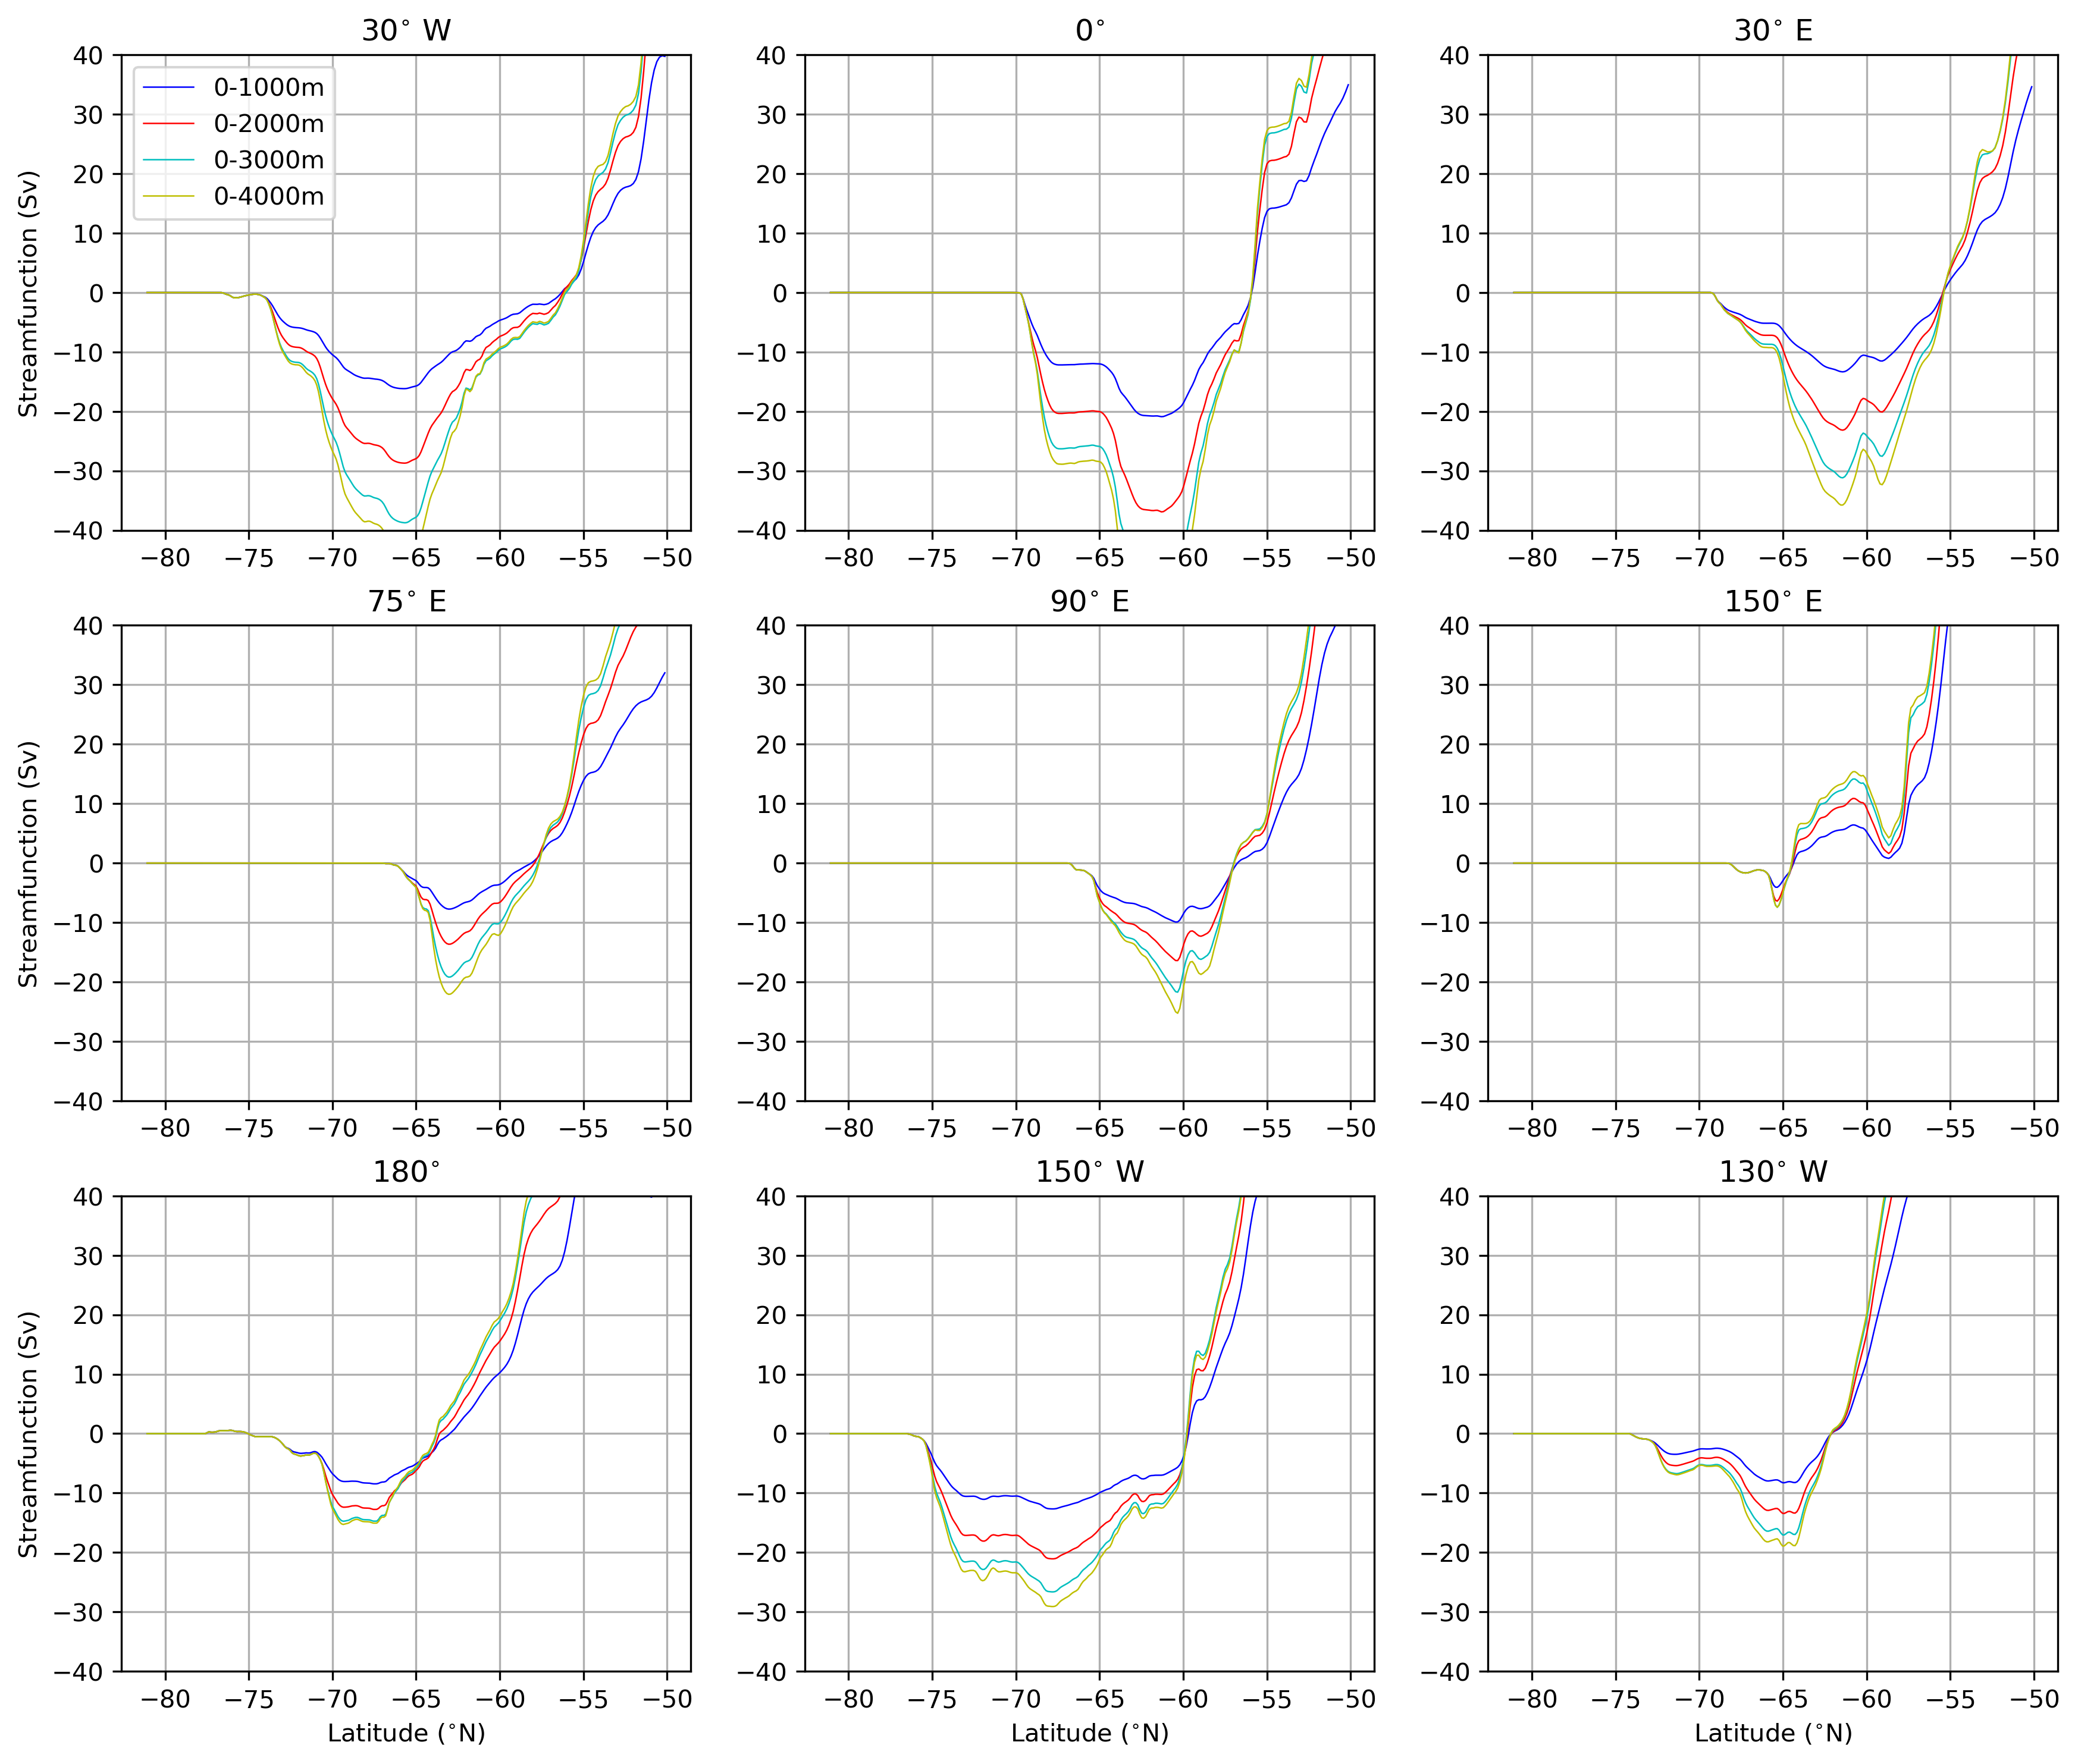

In [40]:
fig = plt.figure(figsize=(14, 12), dpi=300)
# 30W
plt.subplot(3,3,1)
plt.plot(flux11.yt_ocean.values,flux11.values,color = 'b',linewidth = 0.6)
plt.plot(flux21.yt_ocean.values,flux21.values,color = 'r',linewidth = 0.6)
plt.plot(flux31.yt_ocean.values,flux31.values,color = 'c',linewidth = 0.6)
plt.plot(flux41.yt_ocean.values,flux41.values,color = 'y',linewidth = 0.6)
plt.legend(['0-1000m','0-2000m','0-3000m','0-4000m'])
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-40,40)
plt.grid()
plt.title('30$^{\circ}$ W')
# 0
plt.subplot(3,3,2)
plt.plot(flux12.yt_ocean.values,flux12.values,color = 'b',linewidth = 0.6)
plt.plot(flux22.yt_ocean.values,flux22.values,color = 'r',linewidth = 0.6)
plt.plot(flux32.yt_ocean.values,flux32.values,color = 'c',linewidth = 0.6)
plt.plot(flux42.yt_ocean.values,flux42.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('0$^{\circ}$')
# 30 E
plt.subplot(3,3,3)
plt.plot(flux13.yt_ocean.values,flux13.values,color = 'b',linewidth = 0.6)
plt.plot(flux23.yt_ocean.values,flux23.values,color = 'r',linewidth = 0.6)
plt.plot(flux33.yt_ocean.values,flux33.values,color = 'c',linewidth = 0.6)
plt.plot(flux43.yt_ocean.values,flux43.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('30$^{\circ}$ E')
# 75 E
plt.subplot(3,3,4)
plt.plot(flux14.yt_ocean.values,flux14.values,color = 'b',linewidth = 0.6)
plt.plot(flux24.yt_ocean.values,flux24.values,color = 'r',linewidth = 0.6)
plt.plot(flux34.yt_ocean.values,flux34.values,color = 'c',linewidth = 0.6)
plt.plot(flux44.yt_ocean.values,flux44.values,color = 'y',linewidth = 0.6)
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-40,40)
plt.grid()
plt.title('75$^{\circ}$ E')

# 90 E
plt.subplot(3,3,5)
plt.plot(flux15.yt_ocean.values,flux15.values,color = 'b',linewidth = 0.6)
plt.plot(flux25.yt_ocean.values,flux25.values,color = 'r',linewidth = 0.6)
plt.plot(flux35.yt_ocean.values,flux35.values,color = 'c',linewidth = 0.6)
plt.plot(flux45.yt_ocean.values,flux45.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('90$^{\circ}$ E')

# 150 E
plt.subplot(3,3,6)
plt.plot(flux16.yt_ocean.values,flux16.values,color = 'b',linewidth = 0.6)
plt.plot(flux26.yt_ocean.values,flux26.values,color = 'r',linewidth = 0.6)
plt.plot(flux36.yt_ocean.values,flux36.values,color = 'c',linewidth = 0.6)
plt.plot(flux46.yt_ocean.values,flux46.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('150$^{\circ}$ E')

# 180
plt.subplot(3,3,7)
plt.plot(flux17.yt_ocean.values,flux17.values,color = 'b',linewidth = 0.6)
plt.plot(flux27.yt_ocean.values,flux27.values,color = 'r',linewidth = 0.6)
plt.plot(flux37.yt_ocean.values,flux37.values,color = 'c',linewidth = 0.6)
plt.plot(flux47.yt_ocean.values,flux47.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-40,40)
plt.grid()
plt.title('180$^{\circ}$')

# 150 W
plt.subplot(3,3,8)
plt.plot(flux18.yt_ocean.values,flux18.values,color = 'b',linewidth = 0.6)
plt.plot(flux28.yt_ocean.values,flux28.values,color = 'r',linewidth = 0.6)
plt.plot(flux38.yt_ocean.values,flux38.values,color = 'c',linewidth = 0.6)
plt.plot(flux48.yt_ocean.values,flux48.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-40,40)
plt.grid()
plt.title('150$^{\circ}$ W')

# 130 W
plt.subplot(3,3,9)
plt.plot(flux19.yt_ocean.values,flux19.values,color = 'b',linewidth = 0.6)
plt.plot(flux29.yt_ocean.values,flux29.values,color = 'r',linewidth = 0.6)
plt.plot(flux39.yt_ocean.values,flux39.values,color = 'c',linewidth = 0.6)
plt.plot(flux49.yt_ocean.values,flux49.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-40,40)
plt.grid()
plt.title('130$^{\circ}$ W')

In [41]:
flux1 = flux.sel(st_ocean = slice(0,1000)).sum('st_ocean').load()
flux2 = flux.sel(st_ocean = slice(1000,2000)).sum('st_ocean').load()
flux3 = flux.sel(st_ocean = slice(2000,3000)).sum('st_ocean').load()
flux4 = flux.sel(st_ocean = slice(3000,4000)).sum('st_ocean').load()

Text(0, 0.5, 'streamfunction (Sv)')

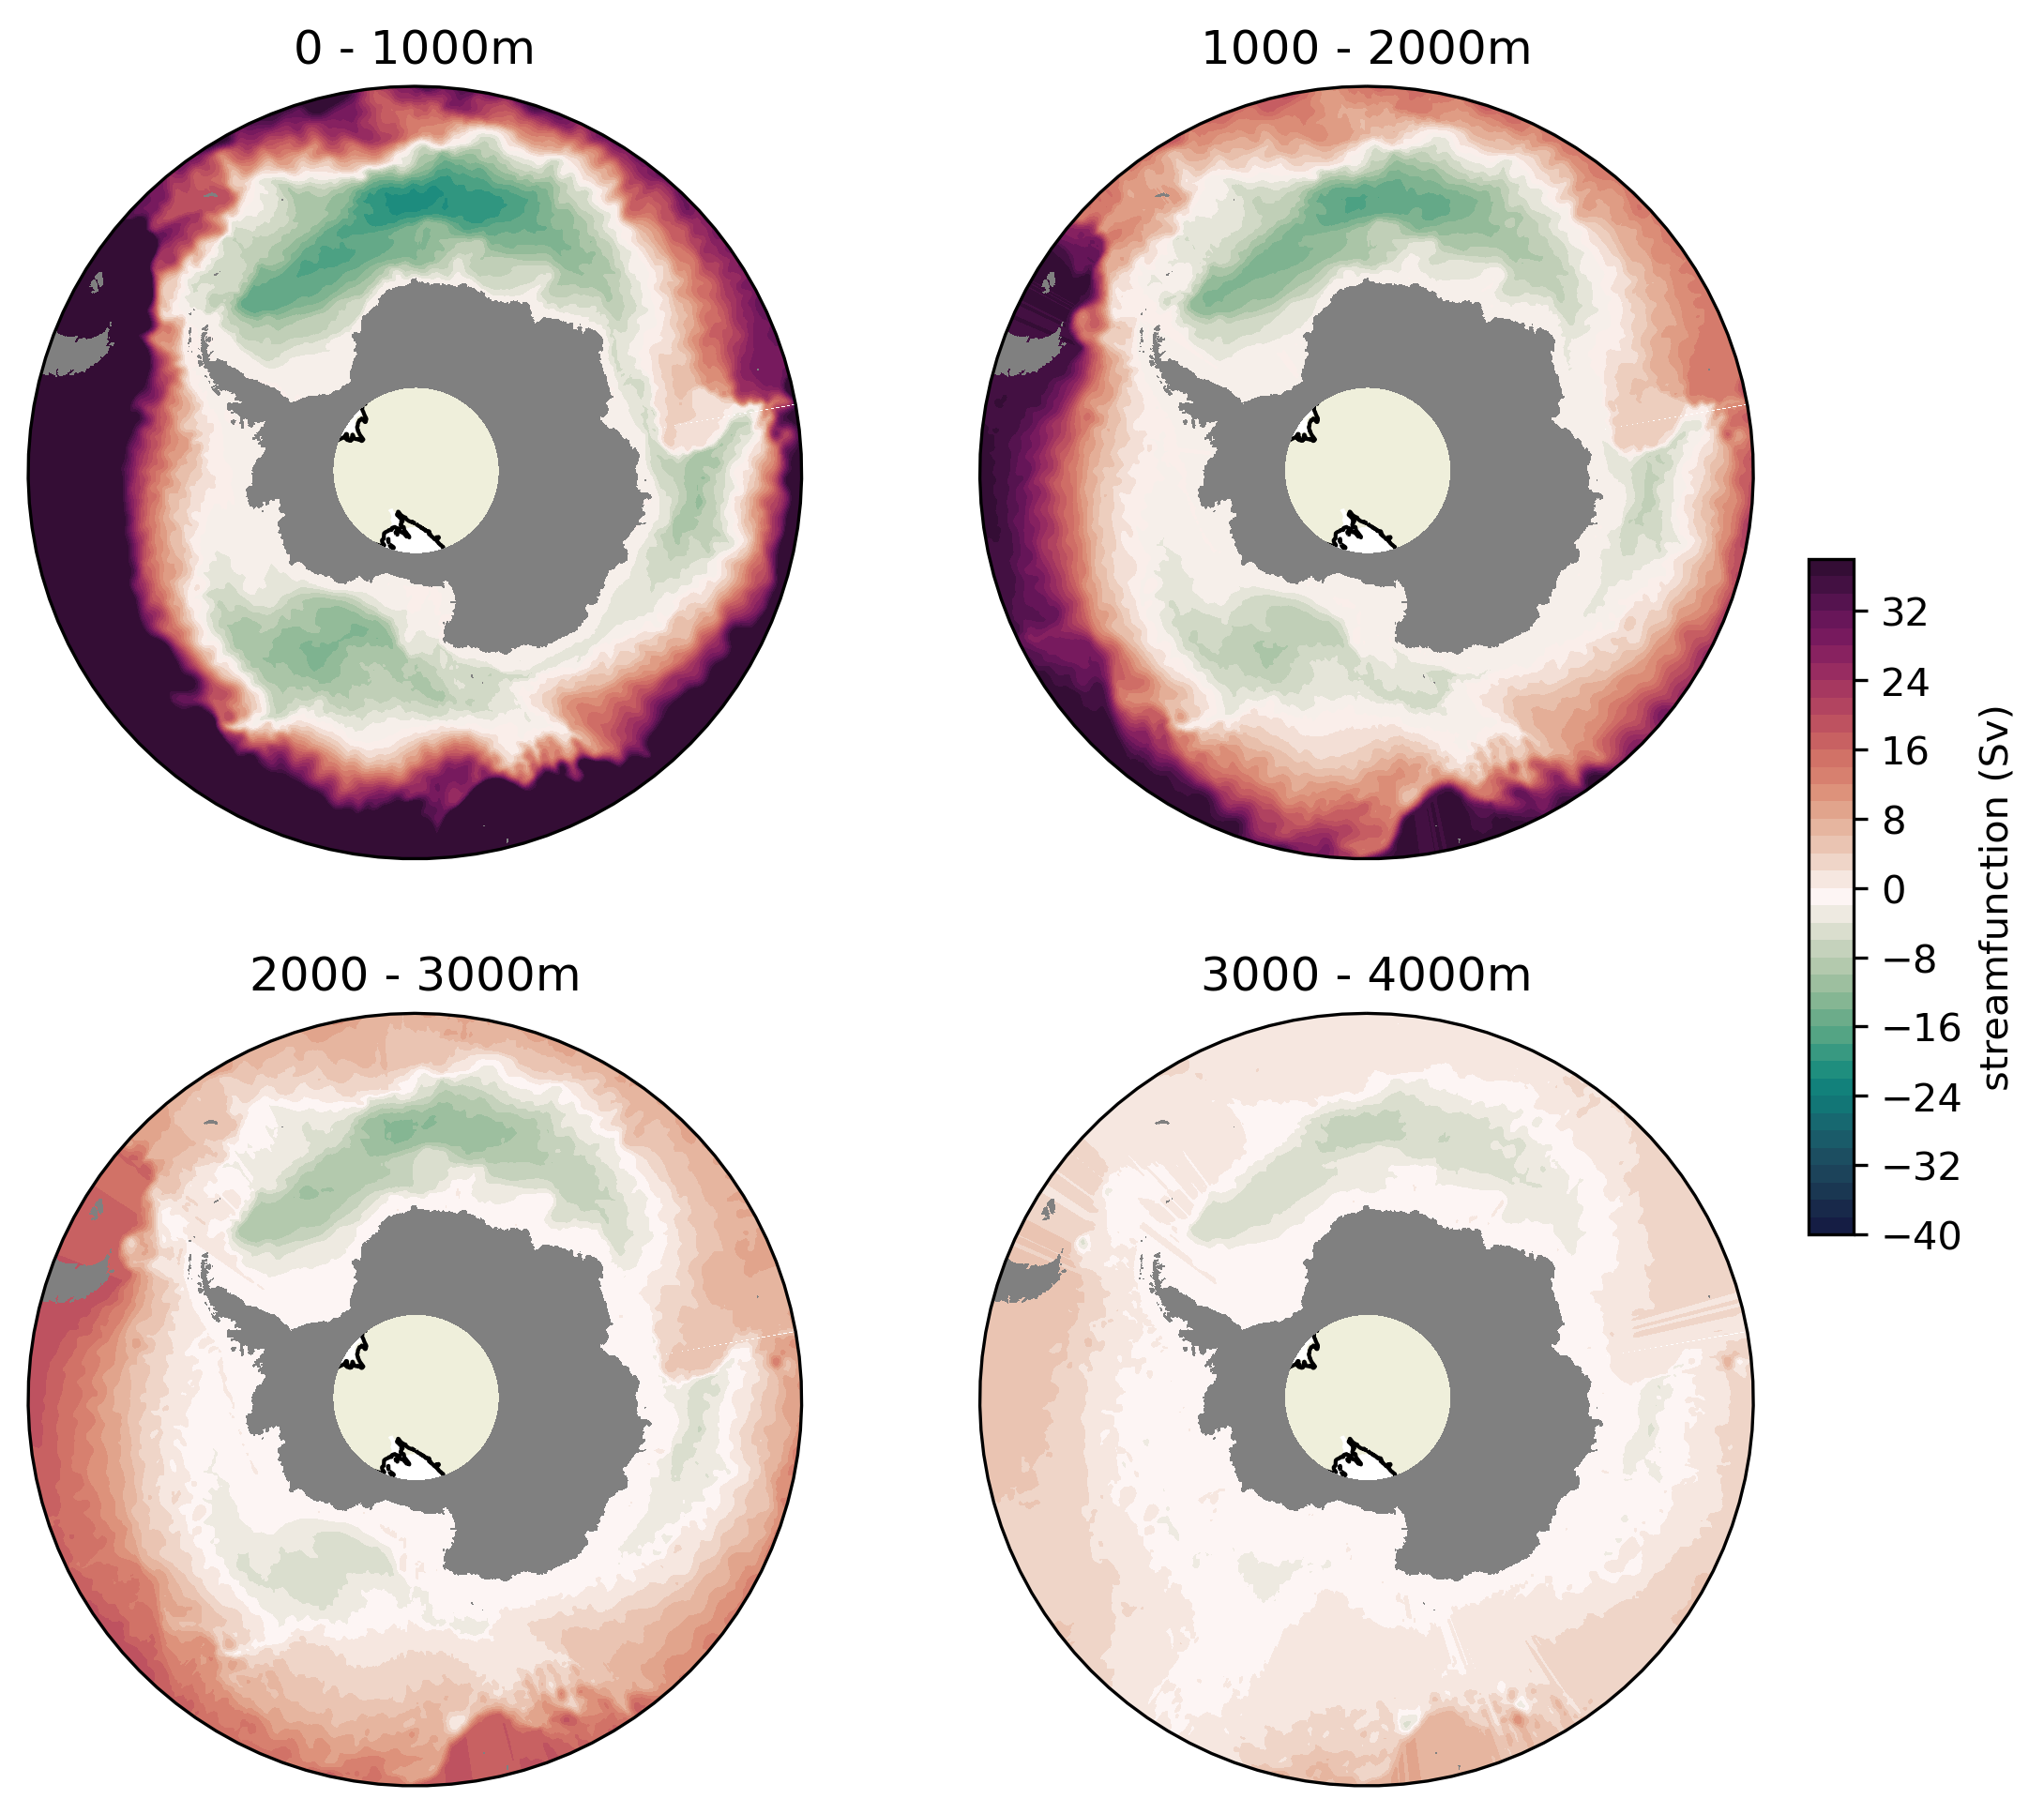

In [42]:
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=300)
# flux1
ax = plt.subplot(2,2,1,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux1.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('0 - 1000m')

# flux2
ax = plt.subplot(2,2,2,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux2.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('1000 - 2000m')

# flux3
ax = plt.subplot(2,2,3,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux3.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('2000 - 3000m')

# flux4
ax = plt.subplot(2,2,4,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux4.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('3000 - 4000m')

# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')

### Now test flux of 4 layers at different longitude

In [43]:
# weddell
# xq = -30
flux11 = flux1.sel(xu_ocean = -30,method = 'nearest')
flux21 = flux2.sel(xu_ocean = -30,method = 'nearest')
flux31 = flux3.sel(xu_ocean = -30,method = 'nearest')
flux41 = flux4.sel(xu_ocean = -30,method = 'nearest')
# xq = 0
flux12 = flux1.sel(xu_ocean = 0,method = 'nearest')
flux22 = flux2.sel(xu_ocean = 0,method = 'nearest')
flux32 = flux3.sel(xu_ocean = 0,method = 'nearest')
flux42 = flux4.sel(xu_ocean = 0,method = 'nearest')
# xq = 30
flux13 = flux1.sel(xu_ocean = 30,method = 'nearest')
flux23 = flux2.sel(xu_ocean = 30,method = 'nearest')
flux33 = flux3.sel(xu_ocean = 30,method = 'nearest')
flux43 = flux4.sel(xu_ocean = 30,method = 'nearest')

# connection
# xq = 75
flux14 = flux1.sel(xu_ocean = 50,method = 'nearest')
flux24 = flux2.sel(xu_ocean = 50,method = 'nearest')
flux34 = flux3.sel(xu_ocean = 50,method = 'nearest')
flux44 = flux4.sel(xu_ocean = 50,method = 'nearest')
# xq = -270
flux15 = flux1.sel(xu_ocean = -270,method = 'nearest')
flux25 = flux2.sel(xu_ocean = -270,method = 'nearest')
flux35 = flux3.sel(xu_ocean = -270,method = 'nearest')
flux45 = flux4.sel(xu_ocean = -270,method = 'nearest')
# xq = -210
flux16 = flux1.sel(xu_ocean = -210,method = 'nearest')
flux26 = flux2.sel(xu_ocean = -210,method = 'nearest')
flux36 = flux3.sel(xu_ocean = -210,method = 'nearest')
flux46 = flux4.sel(xu_ocean = -210,method = 'nearest')

# Ross
# xq = -180
flux17 = flux1.sel(xu_ocean = -180,method = 'nearest')
flux27 = flux2.sel(xu_ocean = -180,method = 'nearest')
flux37 = flux3.sel(xu_ocean = -180,method = 'nearest')
flux47 = flux4.sel(xu_ocean = -180,method = 'nearest')
# xq = -150
flux18 = flux1.sel(xu_ocean = -150,method = 'nearest')
flux28 = flux2.sel(xu_ocean = -150,method = 'nearest')
flux38 = flux3.sel(xu_ocean = -150,method = 'nearest')
flux48 = flux4.sel(xu_ocean = -150,method = 'nearest')
# xq = -130
flux19 = flux1.sel(xu_ocean = -130,method = 'nearest')
flux29 = flux2.sel(xu_ocean = -130,method = 'nearest')
flux39 = flux3.sel(xu_ocean = -130,method = 'nearest')
flux49 = flux4.sel(xu_ocean = -130,method = 'nearest')

Text(0.5, 1.0, '130$^{\\circ}$ W')

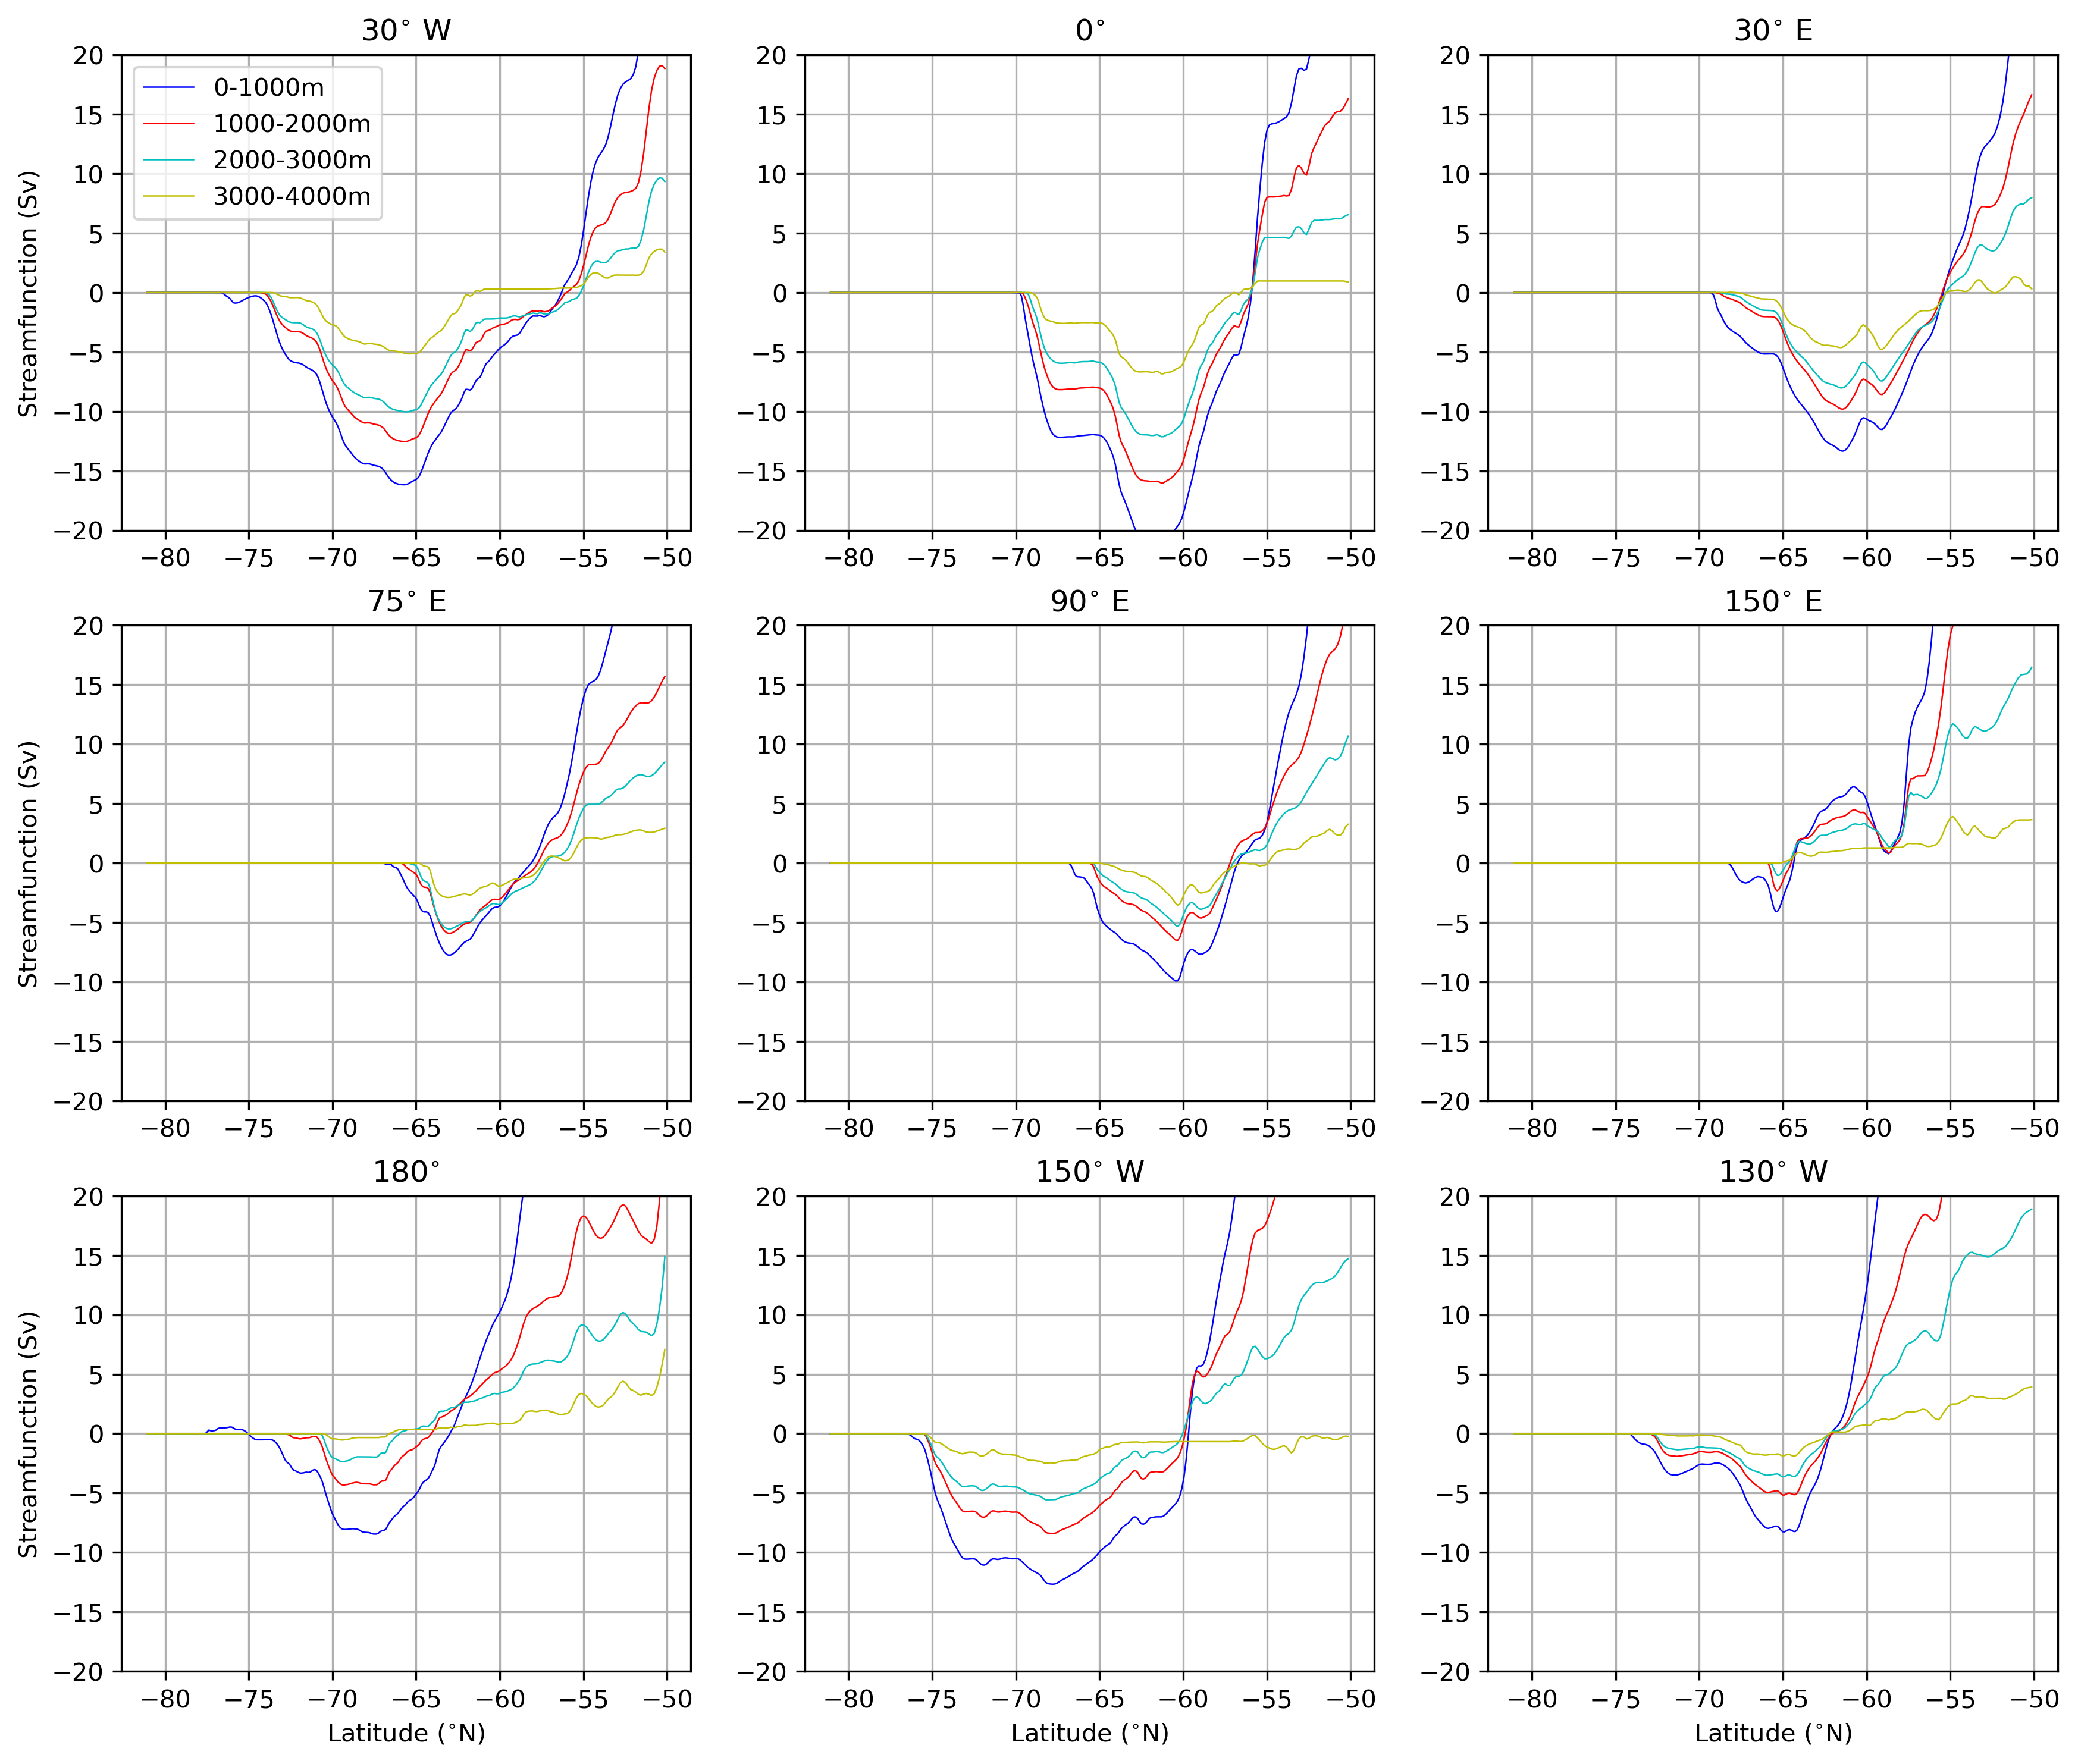

In [44]:
fig = plt.figure(figsize=(14, 12), dpi=300)
# 30W
plt.subplot(3,3,1)
plt.plot(flux11.yt_ocean.values,flux11.values,color = 'b',linewidth = 0.6)
plt.plot(flux21.yt_ocean.values,flux21.values,color = 'r',linewidth = 0.6)
plt.plot(flux31.yt_ocean.values,flux31.values,color = 'c',linewidth = 0.6)
plt.plot(flux41.yt_ocean.values,flux41.values,color = 'y',linewidth = 0.6)
plt.legend(['0-1000m','1000-2000m','2000-3000m','3000-4000m'])
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-20,20)
plt.grid()
plt.title('30$^{\circ}$ W')
# 0
plt.subplot(3,3,2)
plt.plot(flux12.yt_ocean.values,flux12.values,color = 'b',linewidth = 0.6)
plt.plot(flux22.yt_ocean.values,flux22.values,color = 'r',linewidth = 0.6)
plt.plot(flux32.yt_ocean.values,flux32.values,color = 'c',linewidth = 0.6)
plt.plot(flux42.yt_ocean.values,flux42.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('0$^{\circ}$')
# 30 E
plt.subplot(3,3,3)
plt.plot(flux13.yt_ocean.values,flux13.values,color = 'b',linewidth = 0.6)
plt.plot(flux23.yt_ocean.values,flux23.values,color = 'r',linewidth = 0.6)
plt.plot(flux33.yt_ocean.values,flux33.values,color = 'c',linewidth = 0.6)
plt.plot(flux43.yt_ocean.values,flux43.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('30$^{\circ}$ E')
# 75 E
plt.subplot(3,3,4)
plt.plot(flux14.yt_ocean.values,flux14.values,color = 'b',linewidth = 0.6)
plt.plot(flux24.yt_ocean.values,flux24.values,color = 'r',linewidth = 0.6)
plt.plot(flux34.yt_ocean.values,flux34.values,color = 'c',linewidth = 0.6)
plt.plot(flux44.yt_ocean.values,flux44.values,color = 'y',linewidth = 0.6)
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-20,20)
plt.grid()
plt.title('75$^{\circ}$ E')

# 90 E
plt.subplot(3,3,5)
plt.plot(flux15.yt_ocean.values,flux15.values,color = 'b',linewidth = 0.6)
plt.plot(flux25.yt_ocean.values,flux25.values,color = 'r',linewidth = 0.6)
plt.plot(flux35.yt_ocean.values,flux35.values,color = 'c',linewidth = 0.6)
plt.plot(flux45.yt_ocean.values,flux45.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('90$^{\circ}$ E')

# 150 E
plt.subplot(3,3,6)
plt.plot(flux16.yt_ocean.values,flux16.values,color = 'b',linewidth = 0.6)
plt.plot(flux26.yt_ocean.values,flux26.values,color = 'r',linewidth = 0.6)
plt.plot(flux36.yt_ocean.values,flux36.values,color = 'c',linewidth = 0.6)
plt.plot(flux46.yt_ocean.values,flux46.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('150$^{\circ}$ E')

# 180
plt.subplot(3,3,7)
plt.plot(flux17.yt_ocean.values,flux17.values,color = 'b',linewidth = 0.6)
plt.plot(flux27.yt_ocean.values,flux27.values,color = 'r',linewidth = 0.6)
plt.plot(flux37.yt_ocean.values,flux37.values,color = 'c',linewidth = 0.6)
plt.plot(flux47.yt_ocean.values,flux47.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-20,20)
plt.grid()
plt.title('180$^{\circ}$')

# 150 W
plt.subplot(3,3,8)
plt.plot(flux18.yt_ocean.values,flux18.values,color = 'b',linewidth = 0.6)
plt.plot(flux28.yt_ocean.values,flux28.values,color = 'r',linewidth = 0.6)
plt.plot(flux38.yt_ocean.values,flux38.values,color = 'c',linewidth = 0.6)
plt.plot(flux48.yt_ocean.values,flux48.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-20,20)
plt.grid()
plt.title('150$^{\circ}$ W')

# 130 W
plt.subplot(3,3,9)
plt.plot(flux19.yt_ocean.values,flux19.values,color = 'b',linewidth = 0.6)
plt.plot(flux29.yt_ocean.values,flux29.values,color = 'r',linewidth = 0.6)
plt.plot(flux39.yt_ocean.values,flux39.values,color = 'c',linewidth = 0.6)
plt.plot(flux49.yt_ocean.values,flux49.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-20,20)
plt.grid()
plt.title('130$^{\circ}$ W')

# Now 1 deg resolution

In [45]:
umo = cc.querying.getvar(expt='1deg_jra55_iaf_omip2_cycle1', variable='tx_trans', 
                          session=session, frequency='1 monthly',
                          start_time=start_time, 
                          end_time=end_time)

In [46]:
umo = umo.sel(time = slice(start_time,end_time)).sel(yt_ocean = slice(-90,-50))

In [47]:
flux = umo.mean('time').cumsum('yt_ocean')/1e9

### Now we test streamfunction at (x,y) in different depth layer

In [48]:
# layers at 1000m
flux_upp1 = flux.sel(st_ocean = slice(0,1000)).sum('st_ocean').load()
flux_bot1 = flux.sel(st_ocean = slice(1000,10000.)).sum('st_ocean').load()
# layers at 2000m
flux_upp2 = flux.sel(st_ocean = slice(0,2000)).sum('st_ocean').load()
flux_bot2 = flux.sel(st_ocean = slice(2000,10000.)).sum('st_ocean').load()
# layers at 3000m
flux_upp3 = flux.sel(st_ocean = slice(0,3000)).sum('st_ocean').load()
flux_bot3 = flux.sel(st_ocean = slice(3000,10000.)).sum('st_ocean').load()
# layers at 4000m
flux_upp4 = flux.sel(st_ocean = slice(0,4000)).sum('st_ocean').load()
flux_bot4 = flux.sel(st_ocean = slice(4000,10000.)).sum('st_ocean').load()

Text(0, 0.5, 'streamfunction (Sv)')

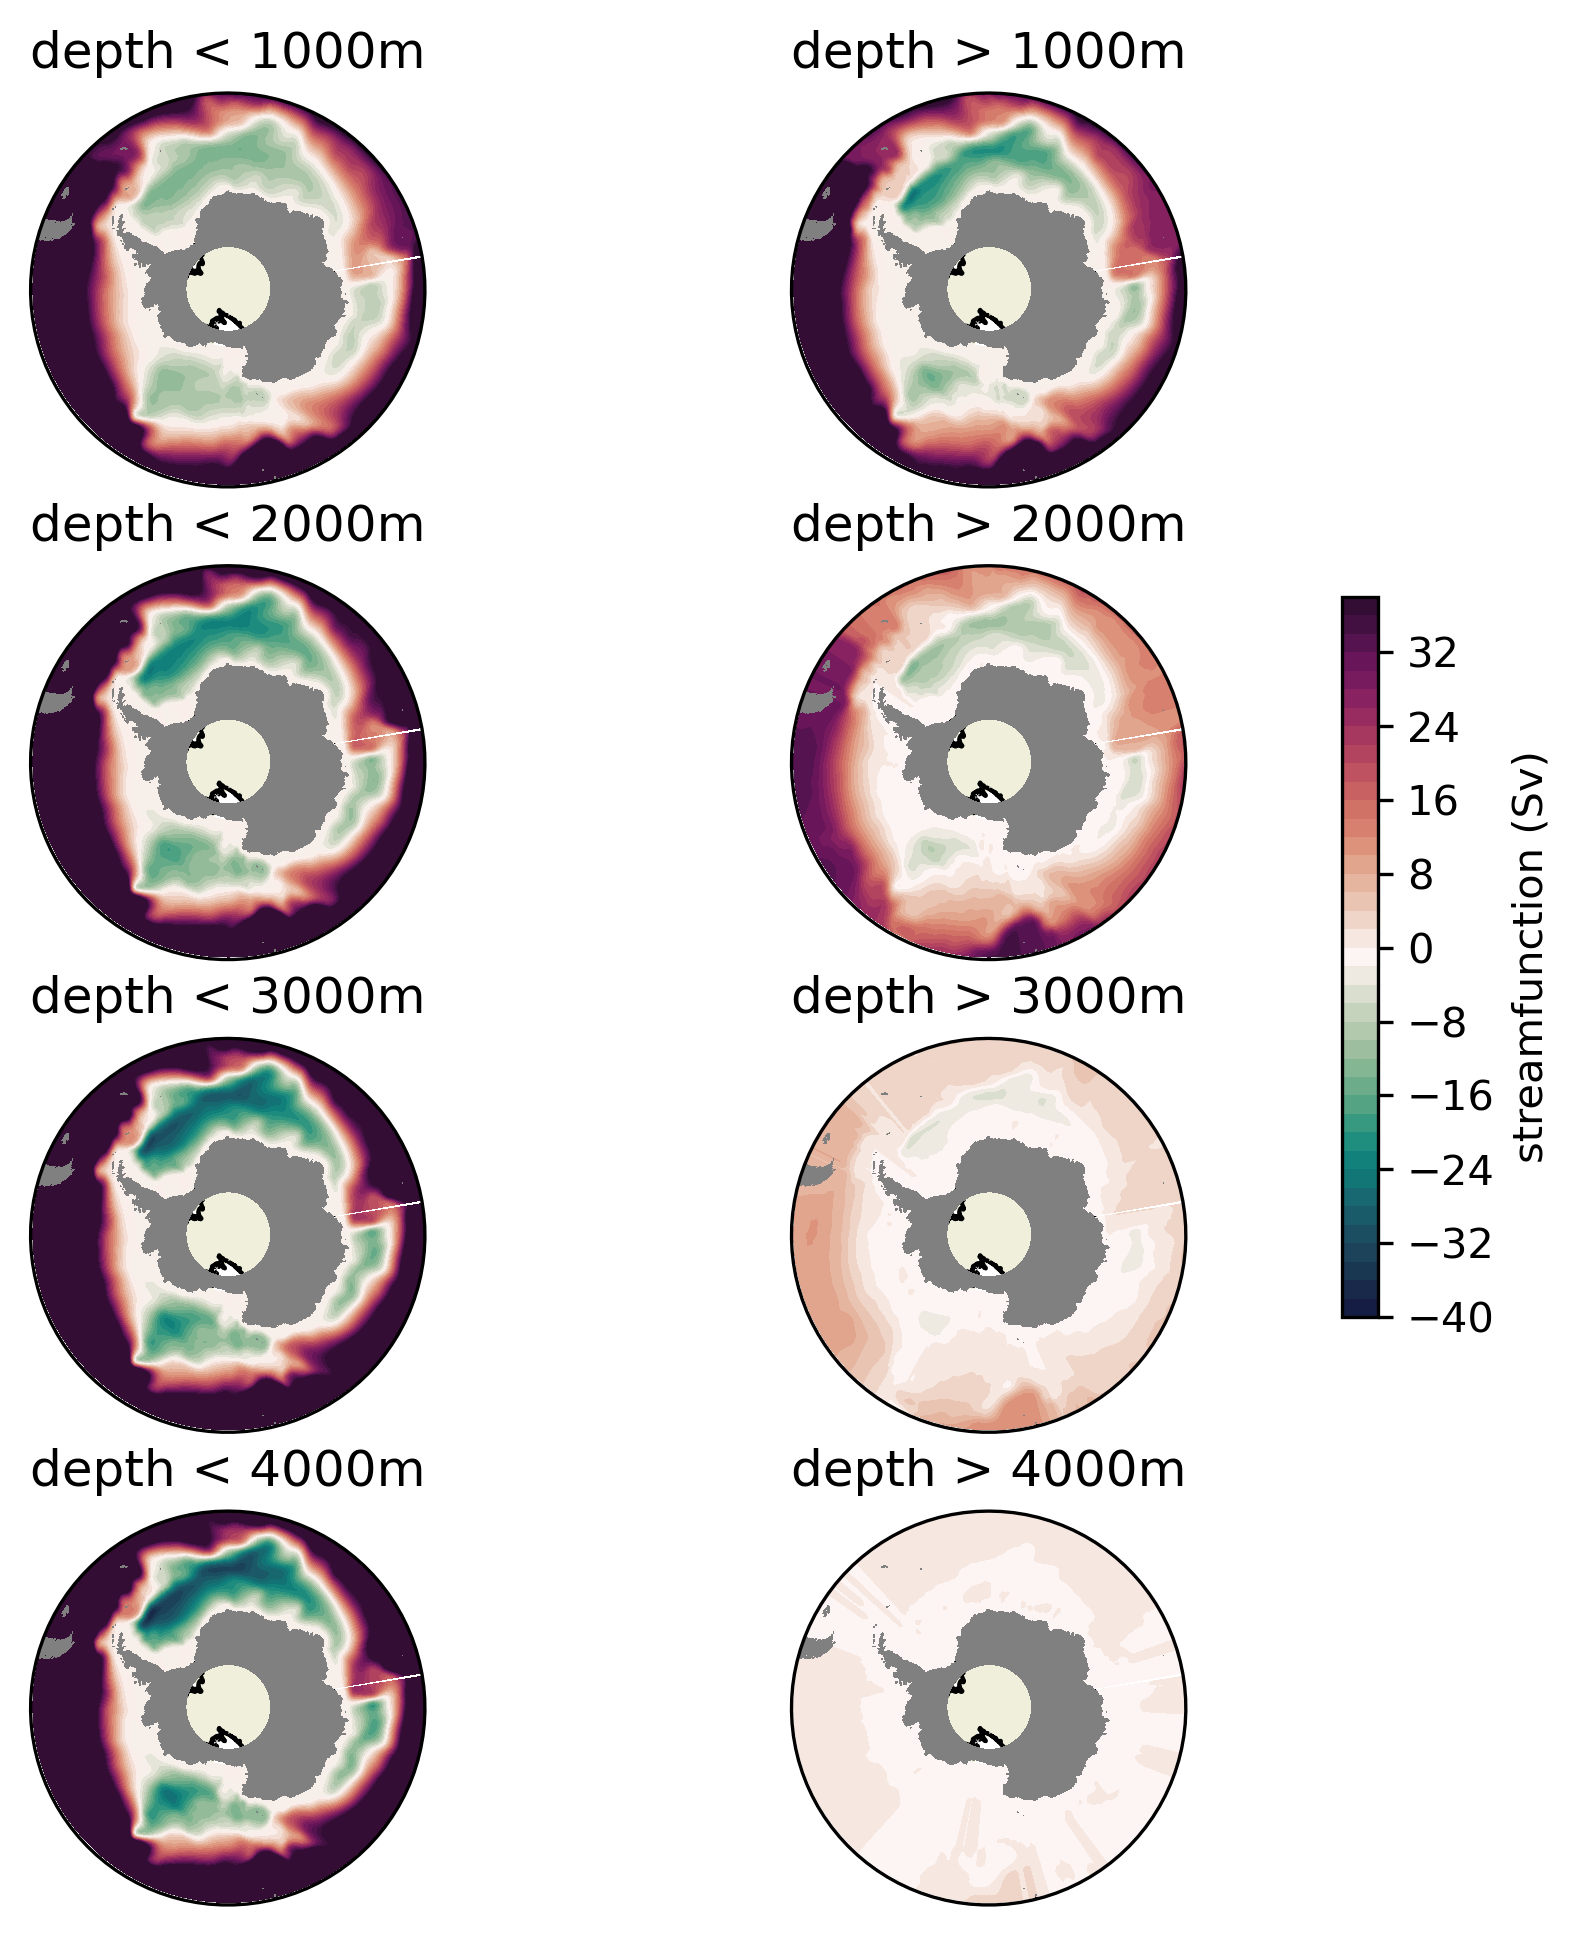

In [49]:
## plot umo and hmo
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(6, 8), dpi=300)
# flux1_upp
ax = plt.subplot(4,2,1,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp1.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 1000m')

# flux1_bot
ax = plt.subplot(4,2,2,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot1.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 1000m')

# flux2_upp
ax = plt.subplot(4,2,3,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp2.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 2000m')

# flux2_bot
ax = plt.subplot(4,2,4,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot2.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 2000m')

# flux3_upp
ax = plt.subplot(4,2,5,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp3.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 3000m')

# flux3_bot
ax = plt.subplot(4,2,6,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot3.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 3000m')

# flux4_upp
ax = plt.subplot(4,2,7,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_upp4.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth < 4000m')

# flux4_bot
ax = plt.subplot(4,2,8,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux_bot4.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('depth > 4000m')

# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')

### different longitudes

In [50]:
# weddell
# xq = -30
flux11 = flux_upp1.sel(xu_ocean = -30,method = 'nearest')
flux21 = flux_upp2.sel(xu_ocean = -30,method = 'nearest')
flux31 = flux_upp3.sel(xu_ocean = -30,method = 'nearest')
flux41 = flux_upp4.sel(xu_ocean = -30,method = 'nearest')
# xq = 0
flux12 = flux_upp1.sel(xu_ocean = 0,method = 'nearest')
flux22 = flux_upp2.sel(xu_ocean = 0,method = 'nearest')
flux32 = flux_upp3.sel(xu_ocean = 0,method = 'nearest')
flux42 = flux_upp4.sel(xu_ocean = 0,method = 'nearest')
# xq = 30
flux13 = flux_upp1.sel(xu_ocean = 30,method = 'nearest')
flux23 = flux_upp2.sel(xu_ocean = 30,method = 'nearest')
flux33 = flux_upp3.sel(xu_ocean = 30,method = 'nearest')
flux43 = flux_upp4.sel(xu_ocean = 30,method = 'nearest')

# connection
# xq = 75
flux14 = flux_upp1.sel(xu_ocean = 50,method = 'nearest')
flux24 = flux_upp2.sel(xu_ocean = 50,method = 'nearest')
flux34 = flux_upp3.sel(xu_ocean = 50,method = 'nearest')
flux44 = flux_upp4.sel(xu_ocean = 50,method = 'nearest')
# xq = -270
flux15 = flux_upp1.sel(xu_ocean = -270,method = 'nearest')
flux25 = flux_upp2.sel(xu_ocean = -270,method = 'nearest')
flux35 = flux_upp3.sel(xu_ocean = -270,method = 'nearest')
flux45 = flux_upp4.sel(xu_ocean = -270,method = 'nearest')
# xq = -210
flux16 = flux_upp1.sel(xu_ocean = -210,method = 'nearest')
flux26 = flux_upp2.sel(xu_ocean = -210,method = 'nearest')
flux36 = flux_upp3.sel(xu_ocean = -210,method = 'nearest')
flux46 = flux_upp4.sel(xu_ocean = -210,method = 'nearest')

# Ross
# xq = -180
flux17 = flux_upp1.sel(xu_ocean = -180,method = 'nearest')
flux27 = flux_upp2.sel(xu_ocean = -180,method = 'nearest')
flux37 = flux_upp3.sel(xu_ocean = -180,method = 'nearest')
flux47 = flux_upp4.sel(xu_ocean = -180,method = 'nearest')
# xq = -150
flux18 = flux_upp1.sel(xu_ocean = -150,method = 'nearest')
flux28 = flux_upp2.sel(xu_ocean = -150,method = 'nearest')
flux38 = flux_upp3.sel(xu_ocean = -150,method = 'nearest')
flux48 = flux_upp4.sel(xu_ocean = -150,method = 'nearest')
# xq = -130
flux19 = flux_upp1.sel(xu_ocean = -130,method = 'nearest')
flux29 = flux_upp2.sel(xu_ocean = -130,method = 'nearest')
flux39 = flux_upp3.sel(xu_ocean = -130,method = 'nearest')
flux49 = flux_upp4.sel(xu_ocean = -130,method = 'nearest')

Text(0.5, 1.0, '130$^{\\circ}$ W')

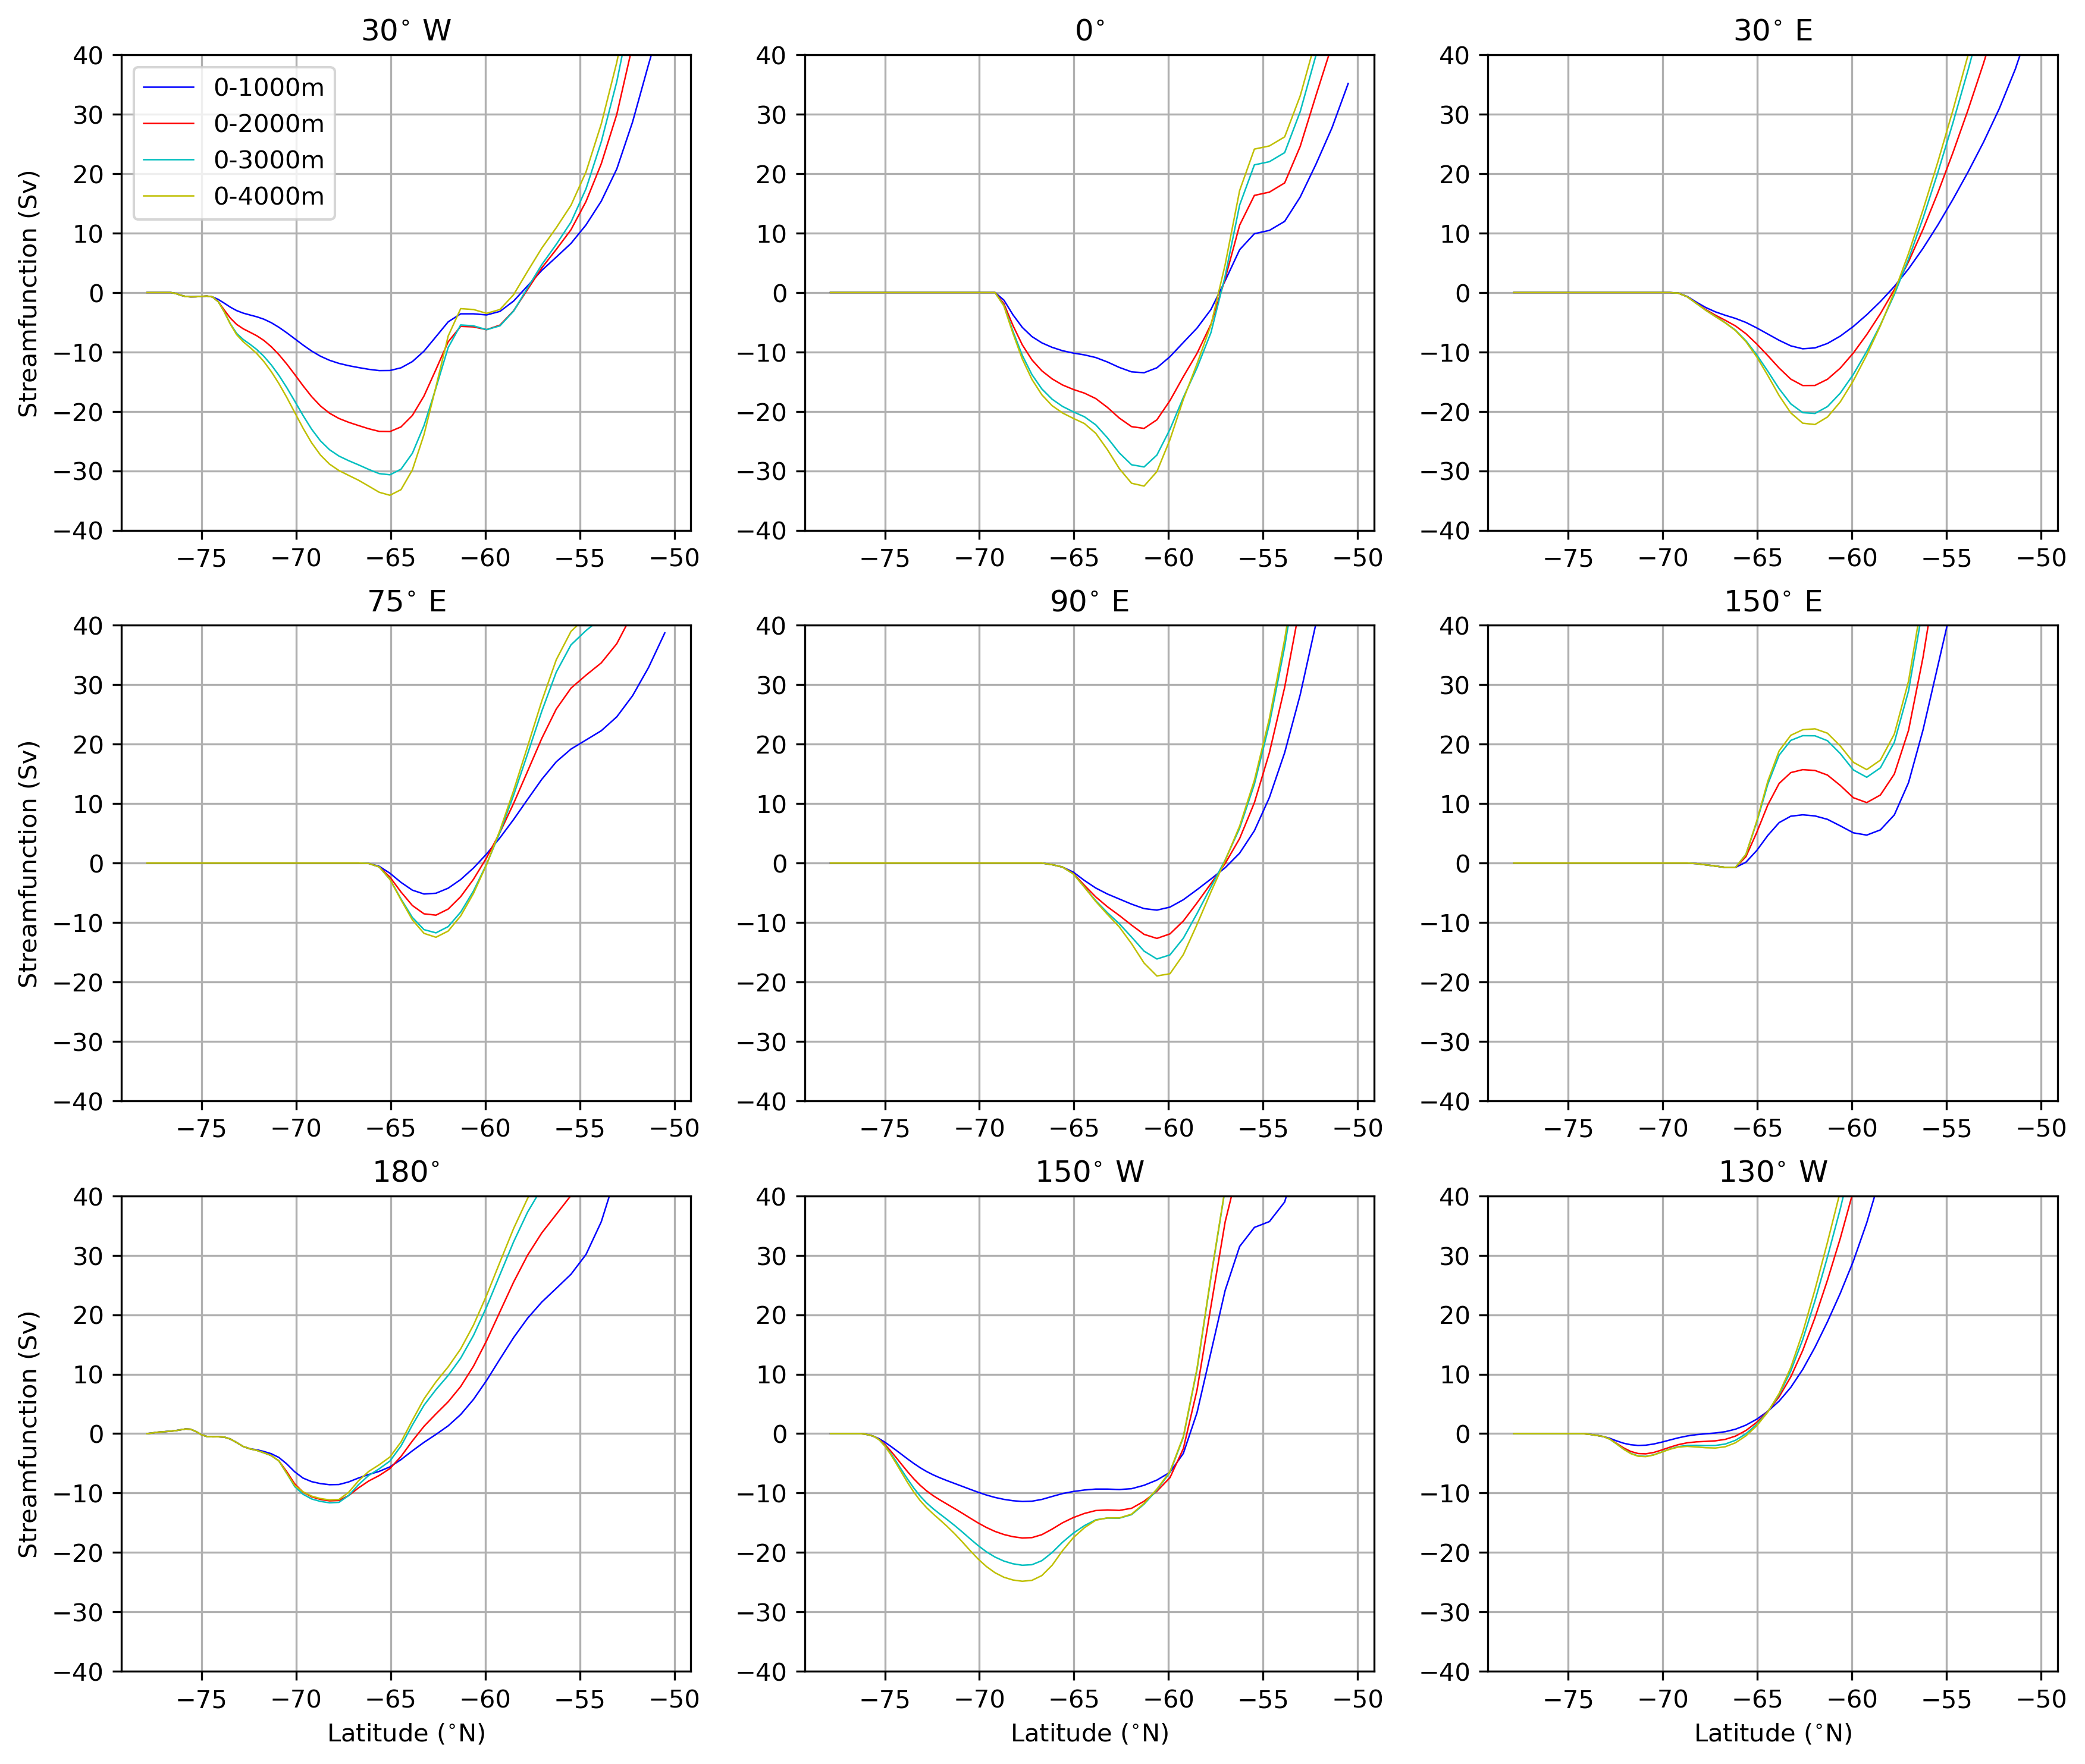

In [51]:
fig = plt.figure(figsize=(14, 12), dpi=300)
# 30W
plt.subplot(3,3,1)
plt.plot(flux11.yt_ocean.values,flux11.values,color = 'b',linewidth = 0.6)
plt.plot(flux21.yt_ocean.values,flux21.values,color = 'r',linewidth = 0.6)
plt.plot(flux31.yt_ocean.values,flux31.values,color = 'c',linewidth = 0.6)
plt.plot(flux41.yt_ocean.values,flux41.values,color = 'y',linewidth = 0.6)
plt.legend(['0-1000m','0-2000m','0-3000m','0-4000m'])
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-40,40)
plt.grid()
plt.title('30$^{\circ}$ W')
# 0
plt.subplot(3,3,2)
plt.plot(flux12.yt_ocean.values,flux12.values,color = 'b',linewidth = 0.6)
plt.plot(flux22.yt_ocean.values,flux22.values,color = 'r',linewidth = 0.6)
plt.plot(flux32.yt_ocean.values,flux32.values,color = 'c',linewidth = 0.6)
plt.plot(flux42.yt_ocean.values,flux42.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('0$^{\circ}$')
# 30 E
plt.subplot(3,3,3)
plt.plot(flux13.yt_ocean.values,flux13.values,color = 'b',linewidth = 0.6)
plt.plot(flux23.yt_ocean.values,flux23.values,color = 'r',linewidth = 0.6)
plt.plot(flux33.yt_ocean.values,flux33.values,color = 'c',linewidth = 0.6)
plt.plot(flux43.yt_ocean.values,flux43.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('30$^{\circ}$ E')
# 75 E
plt.subplot(3,3,4)
plt.plot(flux14.yt_ocean.values,flux14.values,color = 'b',linewidth = 0.6)
plt.plot(flux24.yt_ocean.values,flux24.values,color = 'r',linewidth = 0.6)
plt.plot(flux34.yt_ocean.values,flux34.values,color = 'c',linewidth = 0.6)
plt.plot(flux44.yt_ocean.values,flux44.values,color = 'y',linewidth = 0.6)
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-40,40)
plt.grid()
plt.title('75$^{\circ}$ E')

# 90 E
plt.subplot(3,3,5)
plt.plot(flux15.yt_ocean.values,flux15.values,color = 'b',linewidth = 0.6)
plt.plot(flux25.yt_ocean.values,flux25.values,color = 'r',linewidth = 0.6)
plt.plot(flux35.yt_ocean.values,flux35.values,color = 'c',linewidth = 0.6)
plt.plot(flux45.yt_ocean.values,flux45.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('90$^{\circ}$ E')

# 150 E
plt.subplot(3,3,6)
plt.plot(flux16.yt_ocean.values,flux16.values,color = 'b',linewidth = 0.6)
plt.plot(flux26.yt_ocean.values,flux26.values,color = 'r',linewidth = 0.6)
plt.plot(flux36.yt_ocean.values,flux36.values,color = 'c',linewidth = 0.6)
plt.plot(flux46.yt_ocean.values,flux46.values,color = 'y',linewidth = 0.6)
plt.ylim(-40,40)
plt.grid()
plt.title('150$^{\circ}$ E')

# 180
plt.subplot(3,3,7)
plt.plot(flux17.yt_ocean.values,flux17.values,color = 'b',linewidth = 0.6)
plt.plot(flux27.yt_ocean.values,flux27.values,color = 'r',linewidth = 0.6)
plt.plot(flux37.yt_ocean.values,flux37.values,color = 'c',linewidth = 0.6)
plt.plot(flux47.yt_ocean.values,flux47.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-40,40)
plt.grid()
plt.title('180$^{\circ}$')

# 150 W
plt.subplot(3,3,8)
plt.plot(flux18.yt_ocean.values,flux18.values,color = 'b',linewidth = 0.6)
plt.plot(flux28.yt_ocean.values,flux28.values,color = 'r',linewidth = 0.6)
plt.plot(flux38.yt_ocean.values,flux38.values,color = 'c',linewidth = 0.6)
plt.plot(flux48.yt_ocean.values,flux48.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-40,40)
plt.grid()
plt.title('150$^{\circ}$ W')

# 130 W
plt.subplot(3,3,9)
plt.plot(flux19.yt_ocean.values,flux19.values,color = 'b',linewidth = 0.6)
plt.plot(flux29.yt_ocean.values,flux29.values,color = 'r',linewidth = 0.6)
plt.plot(flux39.yt_ocean.values,flux39.values,color = 'c',linewidth = 0.6)
plt.plot(flux49.yt_ocean.values,flux49.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-40,40)
plt.grid()
plt.title('130$^{\circ}$ W')

In [52]:
flux1 = flux.sel(st_ocean = slice(0,1000)).sum('st_ocean').load()
flux2 = flux.sel(st_ocean = slice(1000,2000)).sum('st_ocean').load()
flux3 = flux.sel(st_ocean = slice(2000,3000)).sum('st_ocean').load()
flux4 = flux.sel(st_ocean = slice(3000,4000)).sum('st_ocean').load()

Text(0, 0.5, 'streamfunction (Sv)')

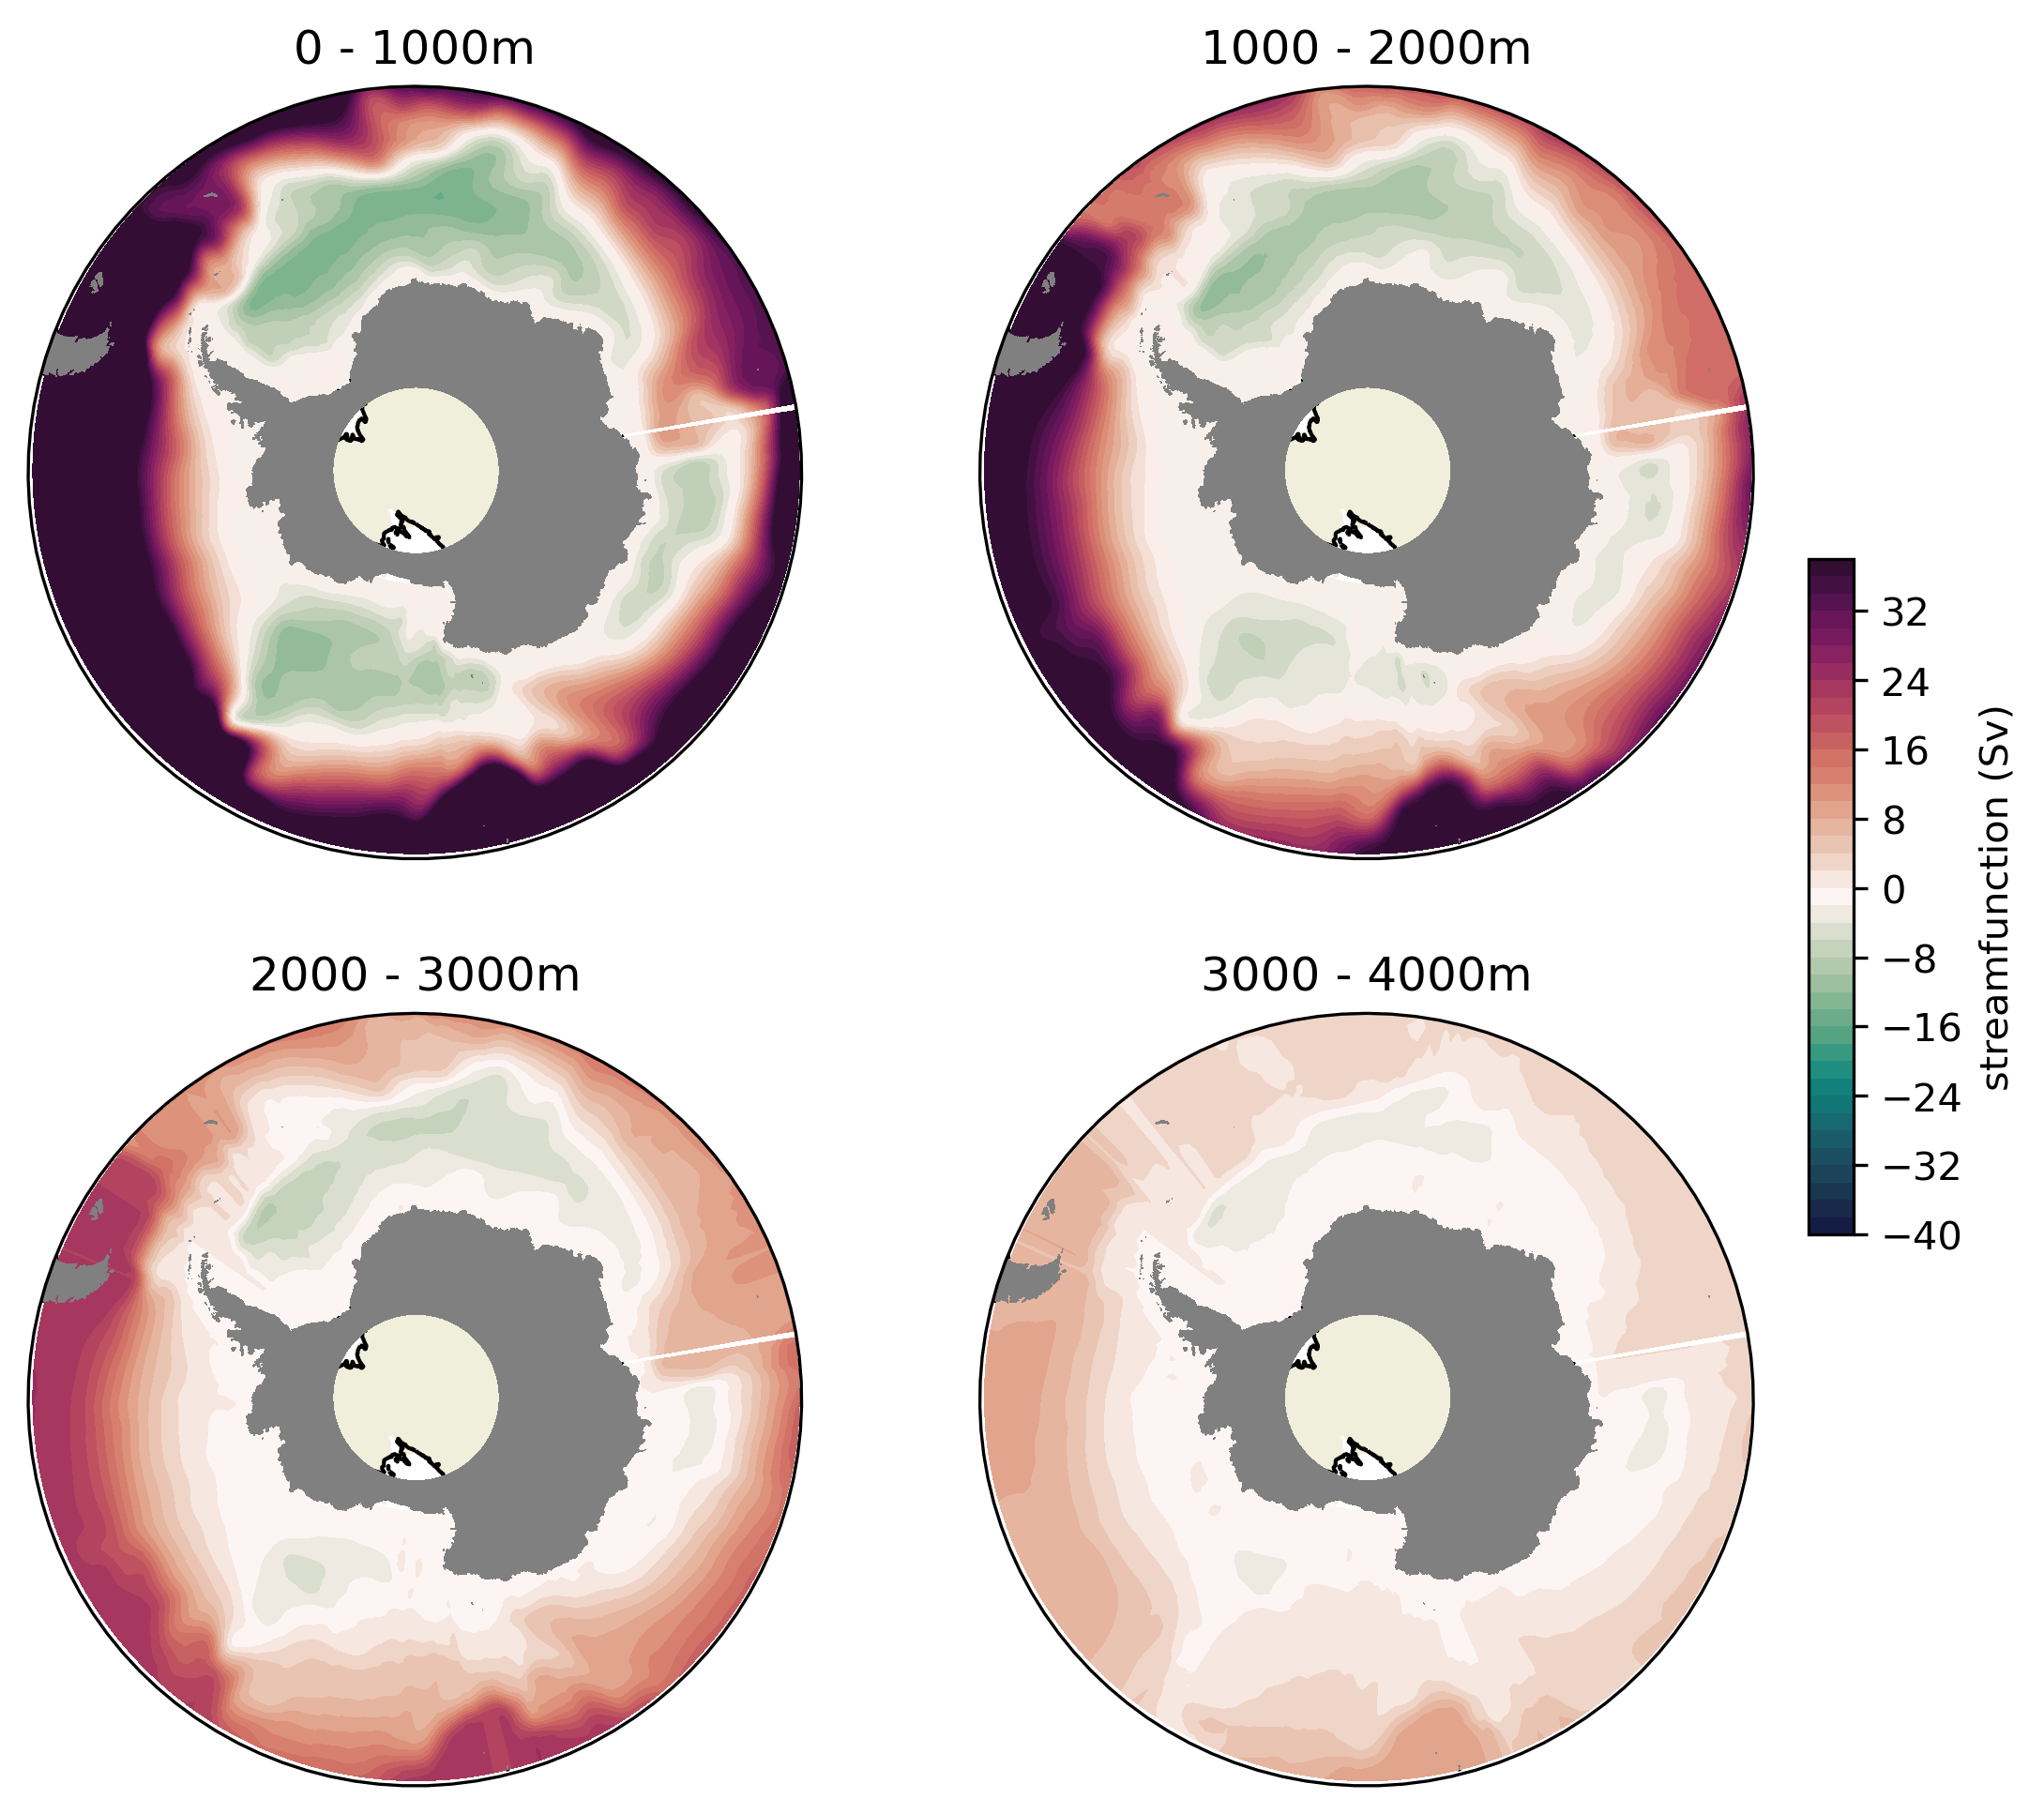

In [53]:
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 8), dpi=300)
# flux1
ax = plt.subplot(2,2,1,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux1.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('0 - 1000m')

# flux2
ax = plt.subplot(2,2,2,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux2.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('1000 - 2000m')

# flux3
ax = plt.subplot(2,2,3,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux3.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('2000 - 3000m')

# flux4
ax = plt.subplot(2,2,4,projection = projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-50], crs = ccrs.PlateCarree())

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = flux4.plot.contourf(ax=ax, levels = np.arange(-40,40,2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.curl, add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.set_title('3000 - 4000m')

# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('streamfunction (Sv)')

### Now test flux of 4 layers at different longitude

In [54]:
# weddell
# xq = -30
flux11 = flux1.sel(xu_ocean = -30,method = 'nearest')
flux21 = flux2.sel(xu_ocean = -30,method = 'nearest')
flux31 = flux3.sel(xu_ocean = -30,method = 'nearest')
flux41 = flux4.sel(xu_ocean = -30,method = 'nearest')
# xq = 0
flux12 = flux1.sel(xu_ocean = 0,method = 'nearest')
flux22 = flux2.sel(xu_ocean = 0,method = 'nearest')
flux32 = flux3.sel(xu_ocean = 0,method = 'nearest')
flux42 = flux4.sel(xu_ocean = 0,method = 'nearest')
# xq = 30
flux13 = flux1.sel(xu_ocean = 30,method = 'nearest')
flux23 = flux2.sel(xu_ocean = 30,method = 'nearest')
flux33 = flux3.sel(xu_ocean = 30,method = 'nearest')
flux43 = flux4.sel(xu_ocean = 30,method = 'nearest')

# connection
# xq = 75
flux14 = flux1.sel(xu_ocean = 50,method = 'nearest')
flux24 = flux2.sel(xu_ocean = 50,method = 'nearest')
flux34 = flux3.sel(xu_ocean = 50,method = 'nearest')
flux44 = flux4.sel(xu_ocean = 50,method = 'nearest')
# xq = -270
flux15 = flux1.sel(xu_ocean = -270,method = 'nearest')
flux25 = flux2.sel(xu_ocean = -270,method = 'nearest')
flux35 = flux3.sel(xu_ocean = -270,method = 'nearest')
flux45 = flux4.sel(xu_ocean = -270,method = 'nearest')
# xq = -210
flux16 = flux1.sel(xu_ocean = -210,method = 'nearest')
flux26 = flux2.sel(xu_ocean = -210,method = 'nearest')
flux36 = flux3.sel(xu_ocean = -210,method = 'nearest')
flux46 = flux4.sel(xu_ocean = -210,method = 'nearest')

# Ross
# xq = -180
flux17 = flux1.sel(xu_ocean = -180,method = 'nearest')
flux27 = flux2.sel(xu_ocean = -180,method = 'nearest')
flux37 = flux3.sel(xu_ocean = -180,method = 'nearest')
flux47 = flux4.sel(xu_ocean = -180,method = 'nearest')
# xq = -150
flux18 = flux1.sel(xu_ocean = -150,method = 'nearest')
flux28 = flux2.sel(xu_ocean = -150,method = 'nearest')
flux38 = flux3.sel(xu_ocean = -150,method = 'nearest')
flux48 = flux4.sel(xu_ocean = -150,method = 'nearest')
# xq = -130
flux19 = flux1.sel(xu_ocean = -130,method = 'nearest')
flux29 = flux2.sel(xu_ocean = -130,method = 'nearest')
flux39 = flux3.sel(xu_ocean = -130,method = 'nearest')
flux49 = flux4.sel(xu_ocean = -130,method = 'nearest')

Text(0.5, 1.0, '130$^{\\circ}$ W')

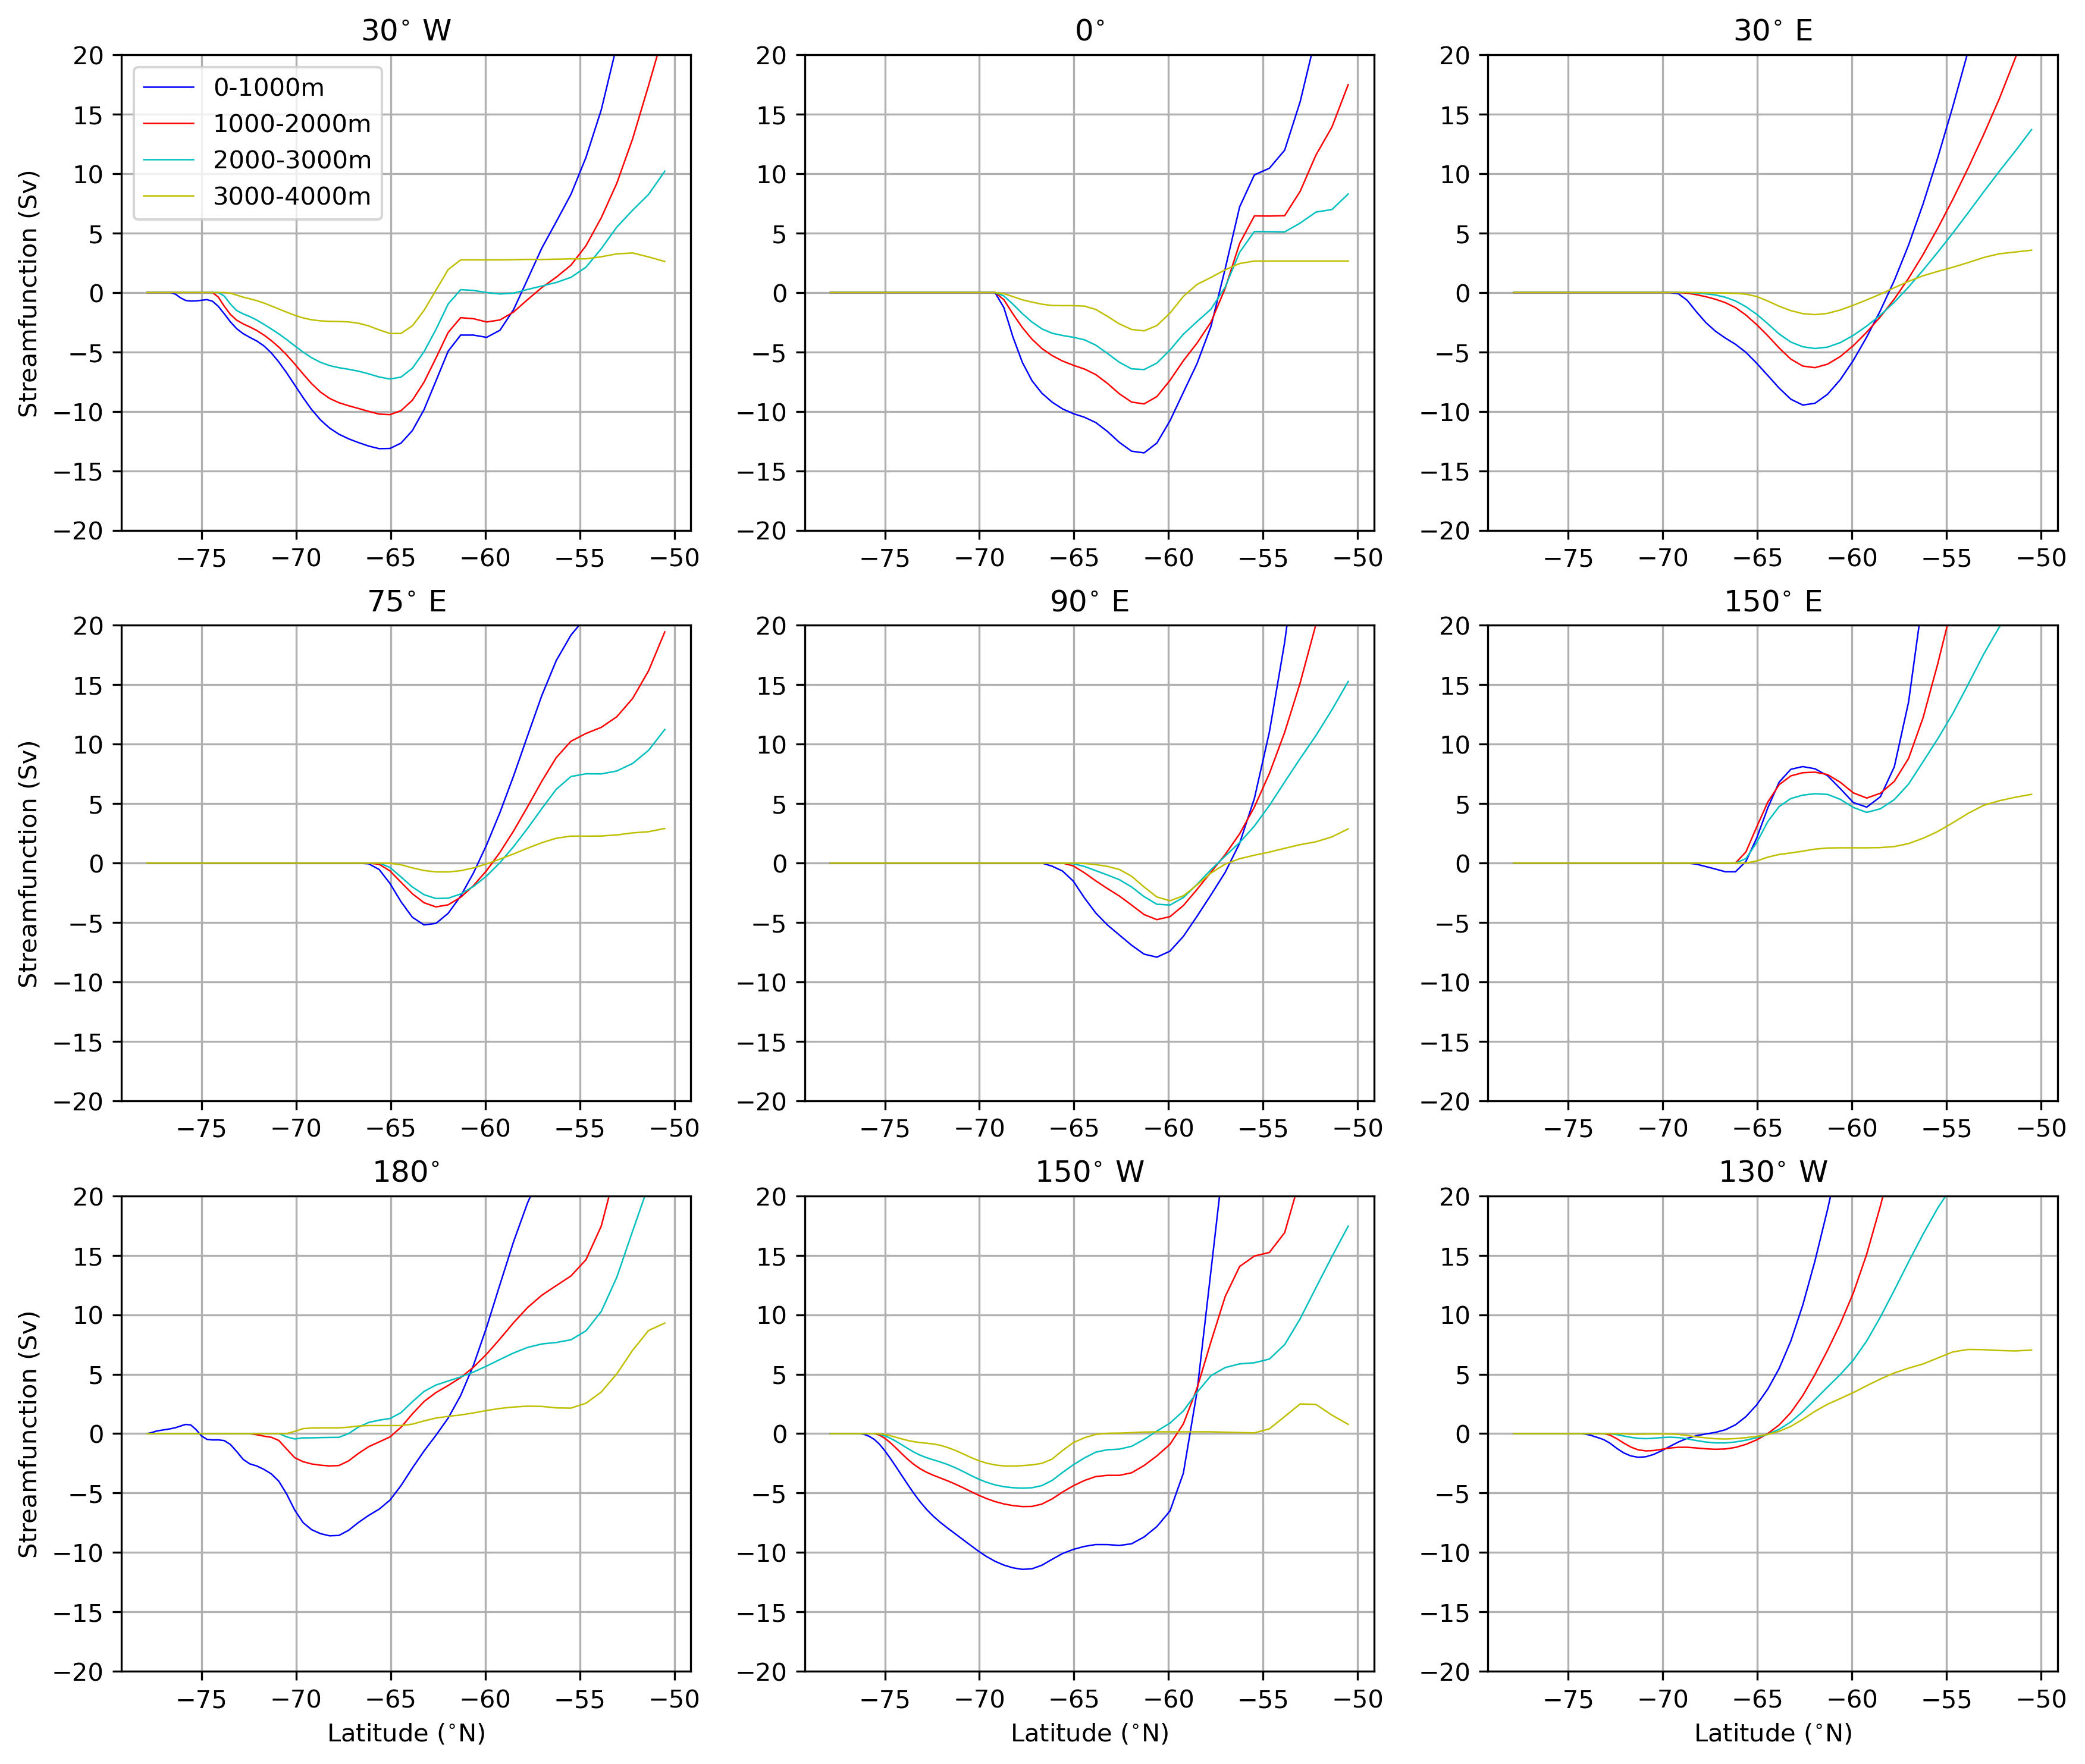

In [55]:
fig = plt.figure(figsize=(14, 12), dpi=300)
# 30W
plt.subplot(3,3,1)
plt.plot(flux11.yt_ocean.values,flux11.values,color = 'b',linewidth = 0.6)
plt.plot(flux21.yt_ocean.values,flux21.values,color = 'r',linewidth = 0.6)
plt.plot(flux31.yt_ocean.values,flux31.values,color = 'c',linewidth = 0.6)
plt.plot(flux41.yt_ocean.values,flux41.values,color = 'y',linewidth = 0.6)
plt.legend(['0-1000m','1000-2000m','2000-3000m','3000-4000m'])
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-20,20)
plt.grid()
plt.title('30$^{\circ}$ W')
# 0
plt.subplot(3,3,2)
plt.plot(flux12.yt_ocean.values,flux12.values,color = 'b',linewidth = 0.6)
plt.plot(flux22.yt_ocean.values,flux22.values,color = 'r',linewidth = 0.6)
plt.plot(flux32.yt_ocean.values,flux32.values,color = 'c',linewidth = 0.6)
plt.plot(flux42.yt_ocean.values,flux42.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('0$^{\circ}$')
# 30 E
plt.subplot(3,3,3)
plt.plot(flux13.yt_ocean.values,flux13.values,color = 'b',linewidth = 0.6)
plt.plot(flux23.yt_ocean.values,flux23.values,color = 'r',linewidth = 0.6)
plt.plot(flux33.yt_ocean.values,flux33.values,color = 'c',linewidth = 0.6)
plt.plot(flux43.yt_ocean.values,flux43.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('30$^{\circ}$ E')
# 75 E
plt.subplot(3,3,4)
plt.plot(flux14.yt_ocean.values,flux14.values,color = 'b',linewidth = 0.6)
plt.plot(flux24.yt_ocean.values,flux24.values,color = 'r',linewidth = 0.6)
plt.plot(flux34.yt_ocean.values,flux34.values,color = 'c',linewidth = 0.6)
plt.plot(flux44.yt_ocean.values,flux44.values,color = 'y',linewidth = 0.6)
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-20,20)
plt.grid()
plt.title('75$^{\circ}$ E')

# 90 E
plt.subplot(3,3,5)
plt.plot(flux15.yt_ocean.values,flux15.values,color = 'b',linewidth = 0.6)
plt.plot(flux25.yt_ocean.values,flux25.values,color = 'r',linewidth = 0.6)
plt.plot(flux35.yt_ocean.values,flux35.values,color = 'c',linewidth = 0.6)
plt.plot(flux45.yt_ocean.values,flux45.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('90$^{\circ}$ E')

# 150 E
plt.subplot(3,3,6)
plt.plot(flux16.yt_ocean.values,flux16.values,color = 'b',linewidth = 0.6)
plt.plot(flux26.yt_ocean.values,flux26.values,color = 'r',linewidth = 0.6)
plt.plot(flux36.yt_ocean.values,flux36.values,color = 'c',linewidth = 0.6)
plt.plot(flux46.yt_ocean.values,flux46.values,color = 'y',linewidth = 0.6)
plt.ylim(-20,20)
plt.grid()
plt.title('150$^{\circ}$ E')

# 180
plt.subplot(3,3,7)
plt.plot(flux17.yt_ocean.values,flux17.values,color = 'b',linewidth = 0.6)
plt.plot(flux27.yt_ocean.values,flux27.values,color = 'r',linewidth = 0.6)
plt.plot(flux37.yt_ocean.values,flux37.values,color = 'c',linewidth = 0.6)
plt.plot(flux47.yt_ocean.values,flux47.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylabel('Streamfunction (Sv)')
plt.ylim(-20,20)
plt.grid()
plt.title('180$^{\circ}$')

# 150 W
plt.subplot(3,3,8)
plt.plot(flux18.yt_ocean.values,flux18.values,color = 'b',linewidth = 0.6)
plt.plot(flux28.yt_ocean.values,flux28.values,color = 'r',linewidth = 0.6)
plt.plot(flux38.yt_ocean.values,flux38.values,color = 'c',linewidth = 0.6)
plt.plot(flux48.yt_ocean.values,flux48.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-20,20)
plt.grid()
plt.title('150$^{\circ}$ W')

# 130 W
plt.subplot(3,3,9)
plt.plot(flux19.yt_ocean.values,flux19.values,color = 'b',linewidth = 0.6)
plt.plot(flux29.yt_ocean.values,flux29.values,color = 'r',linewidth = 0.6)
plt.plot(flux39.yt_ocean.values,flux39.values,color = 'c',linewidth = 0.6)
plt.plot(flux49.yt_ocean.values,flux49.values,color = 'y',linewidth = 0.6)
plt.xlabel('Latitude ($^{\circ}$N)')
plt.ylim(-20,20)
plt.grid()
plt.title('130$^{\circ}$ W')